# Documentation


GeoSMART Oceanography Jupyter Book notes 



## Sections
- 1 [Technical Elements](#Technical-Elements)
- 2 [Shallow Profilers](#Shallow-Profilers)
- 3 [Other Data Resources](#Other-Data-Resources)
- 4 [Computing Infrastructure](#Computing-Infrastructure)



## JupyterBook To Do

- Shallow profiler dataset rebuild from Zarr / Cloud resources
- Refactor the contents 

## Contents


### 1 Technical Elements


#### Useful References

- [Python Data Science Handbook by Jake VanderPlas]((https://jakevdp.github.io/PythonDataScienceHandbook/) (abbreviated herein PDSH).
- [GitHub Markdown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


#### Technical Elements: Topics


- [Markdown](#Markdown): General, LaTeX math, tables
- [Embedding content](#Embedding-content): Images, Animations, Audio, YouTube videos
- [Shell integration](#Shell-integration)
- [Working with NetCDF XArray and Pandas](#Working-with-NetCDF-XArray-and-Pandas)
- [Time](#Time)
- [Missing data](#Missing-data)
- [Resampling](#Resampling)
- [Mapping](#Mapping)
- [Visualization](#Visualization) Matplotlib, IPython interaction widgets
- [Containerization](#Containerization)
- [Annotation](#Annotation)


### Shallow Profilers


[Top](#Documentation)



- Data
- Profiler timing metadata
- Basic charts: **Depth** vs { **A**, **B**, **C**, ... }
- Noon/Midnight charts: pCO2 (Descent), pH (Descent), Nitrate (Ascent), Spectral Irradiance (Ascent)
- Turbulence
- Comparatives
- BioOptics
- Visualization in practice

### Other Data Resources



[Top](#Documentation)



- [GLODAP](#GLODAP)
- [ROMS](#ROMS)
- [MODIS](#MODIS)
- [ARGO](#ARGO)
- [RCA Deep Profilers](#RCA-Deep-Profilers)
- [RCA Sea floor](#RCA-Sea-floor)


### Computing Infrastructure


[Top](#Documentation)


- Toolbox
- Jupyter servers

## Technical Elements


[Top](#Documentation)


### Markdown


[TOC](#1-Technical-Elements)


Markdown is a specialized text formatting style that also accommodates inline HTML.


Back-ticks to delineate `fixed-width font (code etc)`. Use three back-ticks 


```
to offset 
blocks 
of code.
```


- bullet
- lists
    - indent 4 spaces
    - can also use an asterisk `*`



> "quotation-style" text uses greater than `>`

#### LaTeX math formulas 


A big topic; here are a couple examples to get started.


$LaTeX^{\pi}$
    
Single dollar-sign delimiters put content inline: `$e^x = \sum_{i=0}^{\infty}{\frac{x^i}{i!}}$` looks like this: $e^x = \sum_{i=0}^{\infty}{\frac{x^i}{i!}}$. 


Double dollar-sign delimiters create a centered equation:


$$e^x = \sum_{i=0}^{\infty}{\frac{x^i}{i!}}$$


Change size for example with a `\Large` qualifier:


$\Large{e^x = \sum_{i=0}^{\infty}{\frac{x^i}{i!}}}$


#### Tables


Tables can be written as markdown or as HTML. Markdown 'pipe tables' with many columns 
seem buggy in Jupyter notebooks, ymmv. Formatting e.g. left-justify might require some
searching.


| Tables        | Are           | Just So  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | \$1600 |
| col 2 is      | centered      |   \$12 |

In [1]:
%%html

<br>
Here is an HTML tabl running as Python code via %%html cell magic.
<br>

<html>

<body>
    <table>
        <tr>
            <th>Book</th>
            <th>Author</th>
            <th>Genre</th>
        </tr>
        <tr>
            <td>Thief</td>
            <td>Zusak</td>
            <td>Made It Up</td>
        </tr>
    </table>
</body>

</html>

Book,Author,Genre
Thief,Zusak,Made It Up


<br>
Here is the same in a markdown cell
<br>

<!DOCTYPE html>
<html>

<body>
    <table>
        <tr>
            <th>Book</th>
            <th>Author</th>
            <th>Genre</th>
        </tr>
        <tr>
            <td>Thief</td>
            <td>Zusak</td>
            <td>Made It Up</td>
        </tr>
        <tr>
            <td>$x = \pi$</td>
            <td>Holly Berry</td>
            <td>Mathematics</td>
        </tr>
        <tr>
            <td>Burden of Dreams</td>
            <td>Pete</td>
            <td>Nonfiction</td>
        </tr>
    </table>
</body>

</html>

### Embedding content 


[TOC](#1-Technical-Elements)


#### Inline images


We have "in markdown cell" methods (4) and more options "in Python cell". 


##### What works in Jupyter Book render but fails locally

`figure` and `image` directives.


```{figure} ../img/revelle.jpg
---
height: 300px
name: directive-fig
---
Research Vessel Revelle (Scripps)
```


```{image} ../img/revelle.jpg
:alt: revelle
:class: bg-primary mb-1
:width: 500px
:align: left
```



##### What fails in Jupyter Book render but works locally


HTML `<img` construct.


<BR>
<img src="./../img/revelle.jpg" style="float: left;" alt="drawing" width="400"/>
<div style="clear: left">
<BR>

    
##### What works in Jupyter Book and locally but size not adjustable


!-alt-link construct.


![alt](../img/revelle.jpg)

#### Local animation file (mp4) playback

In [2]:
from IPython.display import HTML, Video
Video('./../img/multisensor_animation.mp4', embed=True, width = 500, height = 500)

#### Audio file (mp3) playback


```
from IPython.display import Audio
Audio("<audiofile>.mp3")
```

    
#### YouTube video playback


```
from IPython.display import YouTubeVideo
YouTubeVideo('sjfsUzECqK0')
```

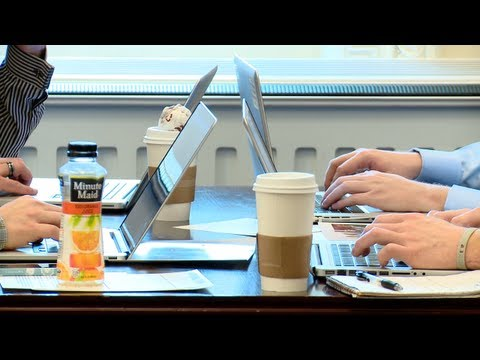

In [40]:
from IPython.display import YouTubeVideo
YouTubeVideo('sjfsUzECqK0')

### Shell integration


[TOC](#1-Technical-Elements)


### Working with NetCDF XArray and Pandas


[TOC](#1-Technical-Elements)


#### Summary


For a general take on data manipulation, particularly with `pandas`: 
See Jake VanDerplas' excellent book Python Data Science Handbook. 


We have here multi-dimensional oceanography datasets in
NetCDF and CSV format. Corresponding Python libraries are `XArray` and `pandas`.
On import these libraries are abbreviated `xr` and `pd` respectively.


The XArray method `.open_dataset('somefile.nc')` returns an XArray Dataset:
A set of XArray DataArrays. The Dataset includes four (or more*) sections: `Dimensions`, 
`Coordinates`, `Data Variables`, and `Attributes`. To examine a Dataset
called `A`: Run `A` (i.e. on a line by itself) to see these constituent sections. 


* "more than four": Discovered while looking at seismic (DAS) data: Some XArray
data may include yet another internal organizing structure.


In pandas the data structure is a DataFrame. Here these are used to manage 
shallow profiler ascent/descent/rest metadata.


Common reductive steps once data are read include removing extraneous components from
a dataset, downsampling, removing NaN values, changing the primary `dimension`
from `obs` (for 'observation') to `time`, combining multiple data files into 
a single dataset, saving modified datasets to new files, and creating charts. 


Datasets that reside within this [GitHub repository](https://github.com/robfatland/ocean)
have to stay pretty small. Larger datasets are downloaded to an external folder. 
See for example the use of `wget` in the **`Global Ocean`** notebook.
The following code shows reduction of a global ocean temperature data file to just
the data of interest (temperature as a 3-D scalar field). 


```
# Reduce volume of an XArray Dataset with extraneous Data Variables:
T=xr.open_dataset('glodap_oxygen.nc')
T.nbytes
T=T[['temperature', 'Depth']]
T.nbytes
T.to_netcdf('temperature.nc')      
```

Data can be down-sampled for example by averaging multiple samples. A tradeoff in down-sampling 
Regional Cabled Array shallow profiler data however is this: Data collected during profiler 
ascent spans 200 meters of water column depth in one hour, or about 6 centimeters per sec. 
A 'thin layer' of signal variation might be washed out by combining samples. 


This repository does include a number of examples of down-sampling and otherwise selecting out
data subsets. 




#### XArray Datasets and DataArrays


##### Summary

There are a million little details about working with XArray Datasets, DataArrays, numpy arrays, pandas DataFrames,
pandas arrays... let's begin! The main idea is that a **DataArray** is an object containing, in the spirit of 
the game, one sort of data; and a **Dataset** is a collection of associated **DataArray**s. 


##### XArray ***Dataset*** basics

**Datasets** abbreviated `ds` have components { dimensions, coordinates, data variables, 
attributes }.


A **DataArray** relates to a **`name`**; needs elaboration. 


```
ds.variables

ds.data_vars                                  # 'dict-like object'

for dv in ds.data_vars: print(dv)
    
choice = 2
this_data_var = list(ds.data_vars)[choice]
print(this_data_var)

ds.coords
ds.dims
ds.attrs
```



##### Load via `open_mfdataset()` with dimension swap from `obs` to `time`


A single NetCDF (`.nc`) file can be opened as an XArray Dataset using `xr.open_dataset(fnm)`. 
Multiple files can be opened as a single XArray Dataset via `xr.open_mfdataset(fnm*.nc)`. 
`mf` stands for `multi-file`. Note 
the wildcard `fnm*` is supported. 

```
def my_preprocessor(fds): return fds.swap_dims({'obs':'time'})

ds = xr.open_mfdataset('files*.nc',                                \
                       preprocess = my_preprocessor,             \
                       concat_dim='time', combine='by_coords')
```

##### Obstacle: Getting information out of a Dataset


There is a sort of comprehension / approach that I have found hard to internalize.
With numpy ndarrays, XArray Datasets, etcetera there is this "how do I get at it?"
problem. As this documentation evolves I will try and articulate the most helpful
mindset. The starting point is that Datasets are built as collections of DataArrays; 
and these have an indexing protocol the merges with a method protocol (`sel`, `merge`
and so on) where the end-result code that does what I want is inevitably very 
elegant. So it is a process of learning that elegant sub-language...


##### Synthesizing along the dimension via `.concat`


```
ds_concat = xr.concat([ds.sel(time=
```


##### Recover a time value as `datetime64` from a Dataset by index


If `time` is a `dimension` it can be referenced via `ds.time[i]`. However
this will be a 1-Dimensional, 1-element DataArray. Adding `.data`
and casting the resulting ndarray (with one element) as a `dt64` works.

```dt64(ds.time[i].data)```


##### Example: XArray transformation flow
    
    
As an example of the challenge of learning `XArray`: The reduction of this data to binned profiles
requires a non-trivial workflow. A naive approach can result in a calculation that should take 
a seconds run for hours. (A key idea of this workflow -- the sortby() step -- is found on page 137 of **PDSH**.)
    
    
- `swap_dims()` to substitute `pressure` for `time` as the ordinate dimension
- `sortby()` to make the `pressure` dimension monotonic
- Create a pressure-bin array to guide the subsequent data reduction
- `groupby_bins()` together with `mean()` to reduce the data to a 0.25 meter quantized profile
- use `transpose()` to re-order wavelength and pressure, making the resulting `DataArray` simpler to plot
- accumulate these results by day as a list of `DataArrays`
- From this list create an `XArray Dataset`
- Write this to a new NetCDF file


##### needs sorting

- Copy: `dsc = ds.copy()`
- Coordinate to data variable: `ds = ds.reset_coords('seawater_pressure')`

##### Example: XArray Dataset subset and chart


Time dimension slice:

```
ds = xr.open_dataset("file.nc")
ds = ds.sel(time=slice(t0, t1))
ds
```

This shows that the temperature Data Variable has a cumbersome name: 
`sea_water_temperature_profiler_depth_enabled`. 

```
ds = ds.rename({'sea_water_temperature_profiler_depth_enabled':'temperature'})
```

Plot this against the default dimension `time`:

```
ds.temperature.plot()
```

Temperature versus depth rather than time:

```
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.plot(ds.temperature, -ds.z, marker='.', markersize=9., color='k', markerfacecolor='r')
axs.set(ylim = (200., 0.), title='temperature against depth')
```

Here `ds.z` is negated to indicate depth below ocean surface.


### More cleanup of Datasets: rename() and drop()


* Use `ds = ds.rename(dictionary-of-from-to)` to rename data variables in a Dataset
* Use `ds = ds.drop(string-name-of-data-var)` to get rid of a data variable
* Use `ds = ds[[var1, var2]]` to eliminate all but those two variables


##### XArray ***DataArray*** name and length


```
sensor_t.name

len(sensor_t)
len(sensor_t.time)           # gives same result
```

What is the name of the controlling dimension?

```
if sensor_t.dims[0] == 'time': print('time is dimension zero')
```

Equivalent; but the second version permits reference by "discoverable" string.


```
sensor_t = ds_CTD_time_slice.seawater_temperature
sensor_t = ds_CTD_time_slice['seawater_temperature']
```

###### Plotting with scaling and offsetting

Suppose I wish to shift some data left to contrast it with some other data (where they would clobber one another)...

```
sensor_t + 0.4
```

Suppose I wish to scale some data in a chart to make it easier to interpret given a fixed axis range

```
sensor_t * 10.               # this fails by trying to make ten copies of the array

np.ones(71)*3.*smooth_t      # this works by creating an inner product
```

### Time


[TOC](#1-Technical-Elements)



### Missing data


[TOC](#1-Technical-Elements)


### Resampling


[TOC](#1-Technical-Elements)




#### Filtering with xrscipy


Some shallow profiler signals (particularly current) are noisy even at
1Min resolution. This suggests a low-pass filter. `xr-scipy` is a thin wrapper 
of scipy for xarray eco-system. It includes digital filter machinery.


- [main site](https://xr-scipy.readthedocs.io/en/latest/index.html)
- [geo applications site](https://scrapbox.io/pycoaj/xr-scipy)


```
import xrscipy.other.signal as dsp
t = np.linspace(0, 1, 1000)  # seconds
sig = xr.DataArray(np.sin(16*t) + np.random.normal(0, 0.1, t.size),
                   coords=[('time', t)], name='signal')
sig.plot(label='noisy')
low = dsp.lowpass(sig, 20, order=8)  # cutoff at 20 Hz
low.plot(label='lowpass', linewidth=5)
plt.legend()
plt.show()
```

(package not installed yet)



### Mapping


[TOC](#1-Technical-Elements)


- cf PyGMT



### Visualization


[TOC](#1-Technical-Elements)


#### Overview


There are two Python plotting libraries: **`matplotlib`** and **`plotly`**. 
**`plotly`** is more advanced and interactive. 
[This link provides more background on it](https://plotly.com/python/) 
including a gallery of examples of what is possible.


Turning to Matplotlib: This library includes the **`.pyplot`** sub-library, 
a MATLAB-parity API. It is the `pyplot` sub-library that is 
most commonly put to use building charts; and to make matters more confusing it is 
habitually imported as `plt`, hence the ubiquitous import line: 
`import matplotlib.pyplot as plt`. With the API now abbreviated as `plt` we 
proceed to generating data charts. 


To make things further complicated: Herein we often generate a grid of charts
for comparison using the `subplots` API call. As an example: 


```
fig,ax=plt.subplots(3,3,figsize=(12,12))
```


- What is `fig`? A figure (???)
- What is `ax`? An array of artists (???)



The main agenda of this repository can be summarized as: 


- reduce a dataset to just some data of interest
- obtain metadata (profile timestamps for example)
- produce charts to visualize this data by means of `.scatter` and `.plot` directives
- proceed to various forms of data analysis


> There is a utility `.plot()` method built into XArray Datasets for a quick view of 
a particular data variable along the `dimension` axis.



> Needed: Detail on how to do formatting, example arguments:
> `vmin=4.,vmax=22.,xincrease=False`


> PDSH recommends the Seaborn library as a chart-building alternative with cleaner graphics.


#### Matplotlib


Big topic: Building charts using the matplotlib library. Here's one to begin with.

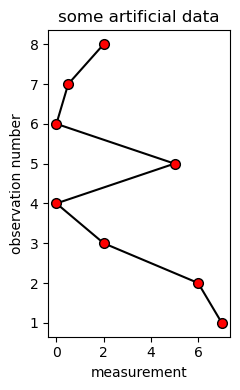

In [41]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(figsize=(2.5,4), tight_layout=True)
axs.plot([7, 6, 2, 0, 5, 0, 0.5, 2], [1, 2, 3, 4, 5, 6, 7, 8], marker='.', markersize=14, color='black', markerfacecolor='red')
axs.set_title('some artificial data'); axs.set_ylabel('observation number'); axs.set_xlabel('measurement'); plt.show()

This chart is an abbreviated archetype of an initial shallow profiler chart:
The vertical axis corresponds to depth, horizontal is a physical measurement. Let's belabor
this for a moment by supposing color coding the markers 'from a separate measurement'.

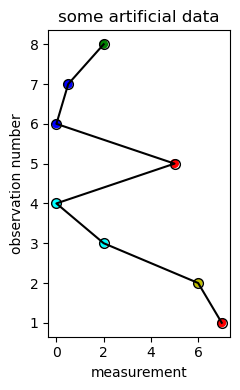

In [42]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(figsize=(2.5,4), tight_layout=True)
axs.plot([7, 6, 2, 0, 5, 0, 0.5, 2], [1, 2, 3, 4, 5, 6, 7, 8], marker='.', markersize=14, color='black', markerfacecolor='none')
axs.scatter([7, 6, 2, 0, 5, 0, 0.5, 2], [1, 2, 3, 4, 5, 6, 7, 8], marker='.', s=120, c=['r', 'y', 'cyan', 'cyan', 'r', 'b', 'b', 'g'])
axs.set_title('some artificial data'); axs.set_ylabel('observation number'); axs.set_xlabel('measurement'); plt.show()

The `axs.plot()` line is the same but for the color change to `'none'`. The result with the added scatter
plot color-codes each data marker. Building the `.scatter()` is not a trivial process, however, 
(`markersize` changes to `s` and the value goes from `14` to `120`...) and the resulting chart is not clean.

#### Widgets

**Widgets** are an Interactive Python (IPython) library for building interactive visualizations. The idea is to set up 
controls such as sliders or selectors that are *wired in* to charting code. Move the slider: Change
a parameter, redraw the chart.


### Containerization


[TOC](#1-Technical-Elements)


### Annotation



[TOC](#1-Technical-Elements)




## Shallow Profilers


As a complete system a shallow profiler consists of two instrument-bearing structures: 
The *platform* and the *profiler*. The platform includes a winch with a cable that holds
the profiler in place during rest intervals. The profiler is positively buoyant so that as
the cable is paid out the profiler rises through the water column to near the surface.
The platform is anchored to the sea bed by means of two cables. Consequently during
conditions of strong current (storms for example) the platform can be temporarily
displaced laterally and downward.


### Data


- Getting datasets from the portal: 1-minute-sample, full resolution (1 sample per second)
- See the `data.ipynb` notebook


### Profile timing metadata


- Nine daily profiles: 7 regular + 2 special: noon/midnight variants
- Basic charts: **Depth** vs { **A**, **B**, **C**, ... }
- Noon/Midnight charts: pCO2 (Descent), pH (Descent), Nitrate (Ascent), Spectral Irradiance (Ascent)


### Turbulence


### Comparatives

- Ascent versus Descent
- At Rest versus Platform
- Profiler versus Discrete CTD cast data (VISIONS cruises)
    
    
### BioOptics

- FDOM/CDOM and Chlorophyll
- Spectral Irradiance
- Spectrophotometer


### More on visualization in practice


- Interactivity: Sliders, Widgets
- Visualizing in 3D
- Saving charts as `.png` images
- Creating chart animations


            
            
### Data manipulation

#### XArray Dataset operations




#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### Shallow profiler **`instrument; sensor(s)`** abbreviation table 


| OOI abbrev | sensors |remark|simple abbrevs|
|--|--|--|--|
|ctdpf|3|CTD: includes a variety of sensors|ctd; salinity, temperature, pressure, density, conductivity
|pco2|1|carbonate chemistry, midnight and noon *descent* only|pco2; pco2
|phsen|1|pH, midnight and noon *descent* only|ph; ph
|nutnr|2|nitrate, dark samples; midnight and noon *ascent* only|nitrate; nitrate
|flort|3|Fluorometer triplet: chlorophyll-A, FDOM, backscatter|fluor; chlora, fdom, bb
|spkir|7|spectral irradiance: optical absorbance and beam attenuation|spkir; oa\#, ba\#
|parad|1|photosynthetically available radiation 'PAR'|par; par
|optaa|86|spectrophotometer: 86 bands, ascent noon/midnight|sp; sp\#\#

### Slow resampling problem


The shallow profiler spectrophotometer has 86 channels. Each observation has 
a corresponding depth and time, typically several thousand per profile.
The XArray Dataset has `time` swapped in for `obs` dimension but we are 
interested in resampling into depth bins. This took hours; which was 
puzzling. However page 137 of PDSH, on **Rearranging Multi-Indices**
and **Sorted and unsorted indices** provides this resolution: 

> ***Rearranging Multi-indices***<BR>
One of the keys to working with multiply indexed data is knowing how to effectively 
transform the data. There are a number of operations that will preserve all the 
information in the dataset, but rearrange it for the purposes of various computations. 
[...] There are many [ways] to finely control the rearrangement
of data between heirarchical indices and columns.
    
> ***Sorted and unsorted indices***<BR>
Earlier, we briefly mentioned a caveat, but we should emphasize it more here. 
*Many of the `MultiIndex`slicing operations will fail if the index is not sorted.*

In [43]:
# Adrift content



- merge() ...?... 
    - Order: `.merge()` then `.resample()` with `mean()`; or vice versa? (existing code is vice-versa)
    - This approach does resampling prior to merge but was taking way too long
- resampling

```
ds = ds.reset_coords('seawater_pressure')        # converts the coordinate to a data variable
ds_mean = ds.resample(time='1Min').mean()
ds_std  = ds.resample(time='1Min').std()
```

- How to copy a dataset, how to move a coordinate to a data variable

    - ./images/misc/optaa_spectra_0_10_20_JAN_2019.png
    - ./images/misc/nitrate_2019_JAN_1_to_10.png
- pH sensor fire once at the end of every profile; back in the platform***
- Manufacturer etc: [here](https://interactiveoceans.washington.edu/instruments/).
- ...but the DataArray can itself be invoked with `.attrs` to see additional attributes that are invisible

```
ds.density.attrs
```

- Optical absorption spectrophotometer
    * Seabird Scientific (acquired WETLABS): 'AC-S' model (shallow profilers)
        * 86 wavelengths per sample; in practice some nan values at both ends
        * Interview Chris for more procedural / interpretive SME
        * Operates only during shallow profiler ascents
            * Only on the two "nitrate" ascents each day
            * One sample per 0.27 seconds
                * However it often does a "skip" with a sample interval about 0.5 seconds
        * Spectral absorption: parameter `a`, values typically 20 - 45. 
        * Attenuation is `c` with values on 0 to 1.
        * Coordinates we want are `time`, `int_ctd_pressure`, `wavelength`
            * `time` and `wavelength` are also dimensions
        * Data variables we want are `beam_attenuation` (this is `c`) and `optical_absorption` (`a`)
        * Per year data is about 1.7 billion floating point numbers
            * 86 wavelengths x 2 (c, a) x 2 (ascent / day) x 14,000 (sample / ascent) x 365

        

- Photosynthetically Active Radiation (PAR)
    * Devices mounted on the shallow profiler and the SP platform
    * Seabird Scientific (from acquisition of Satlantic): PAR model
    * Some ambiguity in desired result: `par`, `par_measured` and `par_counts_output` are all present in the data file
        * Since `qc` values are associated with it I will simply use `par_counts_output`
        
        
- Fluorometer
    * WETLABS (Seabird Scientific from acquisition) Triplet
    * Chlorophyll emission is at 683 nm
    * Measurement wavelengths in nm are 700.0 (scattering), 460.0 (cdom) and 695.0 (chlorophyll)
    * Candidate Data variables
        * Definites are `fluorometric_chlorophyll_a` and `fluorometric_cdom`
        * Possibles are `total_volume_scattering_coefficient`, `seawater_scattering_coefficient`, `optical_backscatter`
            * qc points to total volume scattering and optical backscatter but I'll keep all three
  
  
- Nitrate nutnr_a_sample and nutnr_a_dark_sample
    * The nitrate run ascent is ~62 minutes (ascent only); ~3 meters per minute
        * Ascent is about 14,000 samples; so 220 samples per minute
        * That is 70 samples per meter depth over 20 seconds
        * Per the User's Manual post-processing gets rather involved


- pCO2 water (two streams: pco2w_b_sami_data_record and pco2w_a_sami_data_record)


SyntaxError: unterminated string literal (detected at line 60) (1449922703.py, line 60)

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### One minute resampling


This is the practical implementation of index sorting described above and in *PDSH*.


`XArray Datasets` feature selection by time range: `ds.sel(time=slice(timeA, timeB))`
and resampling by time interval: `ds.resample(time='1Min').mean()`. 
(Substitute `.std()` to expand into standard deviation signals.)


```
ds = xr.open_dataset(ctd_data_filename)
tJan1 = dt64('2019-01-01')
tFeb1 = dt64('2019-02-01')
ds = ds.sel(time=slice(tJan1, tFeb1))
ds1Min = ds.resample(time='1Min').mean()
```



The problem however is that the resample() execution in the code above
can hang. The select operation `.sel()` is not understood by XArray as a monotonic
time dimension monotonic. It may be treated as a jumble even if it is not! 
This can become even more catastrophic when other dimensions are present. 
The following work-around uses `pandas Dataframes`. 



This code moves the 
XArray Dataset contents into a pandas DataFrame.
Here they are resampled properly; and the resulting
columns are converted into a list of XArray DataArrays.
These are then combined to form a new Dataset with 
the desired resampling completed quickly. 



```
df   = ds.to_dataframe().resample("1Min").mean()
vals = [xr.DataArray(data=df[c],                  \
                     dims=['time'],               \
                     coords={'time':df.index},    \
                     attrs=ds[c].attrs)           \
           for c in df.columns]
ds = xr.Dataset(dict(zip(df.columns, vals)), attrs=ds.attrs)
ds.to_netcdf('new_data_file.nc')
```

Flourometry code redux: For OSB shallow profiler triplet, to 1Min samples, JAN 2019


```
ds_Fluorometer = xr.open_dataset('/data/rca/fluorescence/osb_sp_flort_2019.nc')
time_jan1, time_feb1 = dt64('2019-01-01'), dt64('2019-02-01')
ds_Fluor_jan2019 = ds_Fluorometer.sel(time=slice(time_jan1, time_feb1))
df               = ds_Fluor_jan2019.to_dataframe().resample("1Min").mean()
vals             = [xr.DataArray(data=df[c], dims=['time'], coords={'time':df.index}, \
                    attrs=ds_Fluor_jan2019[c].attrs) for c in df.columns]
xr.Dataset(dict(zip(df.columns, vals)), \
           attrs=ds_Fluor_jan2019.attrs).to_netcdf('./data/rca/fluorescence/osb_sp_fluor_jan2019.nc')
```

Spectral irradiance stopgap version: Break out by spectrum (should be dimension of just one file).

```
spectral_irradiance_source = '/data/rca/irradiance/'
spectral_irradiance_data = 'osb_sp_spkir_2019.nc'
ds_spectral_irradiance = xr.open_dataset(spectral_irradiance_source + spectral_irradiance_data)
ds_spectral_irradiance
time_jan1, time_feb1 = dt64('2019-01-01'), dt64('2019-02-01')
ds_Irr_jan2019 = ds_spectral_irradiance.sel(time=slice(time_jan1, time_feb1))
df = [ds_Irr_jan2019.sel(spectra=s).to_dataframe().resample("1Min").mean() for s in ds_Irr_jan2019.spectra]
r = [xr.Dataset(dict(zip(q.columns, 
                         [xr.DataArray(data=q[c], dims=['time'], coords={'time':q.index}, \
                                       attrs=ds_Irr_jan2019[c].attrs) for c in q.columns] \
                    )   ), 
                attrs=ds_Irr_jan2019.attrs)
    for q in df]
for i in range(7): r[i].to_netcdf('./data/rca/irradiance/osb_sp_irr_spec' + str(i) + '.nc')
```


Spectral irradiance related skeleton code showing use of `.isel(spectra=3)`: 


```
ds = ds_spkir.sel(time=slice(time0, time1))
da_depth = ds.int_ctd_pressure.resample(time='1Min').mean()
dsbar = ds.resample(time='1Min').mean()
dsstd = ds.resample(time='1Min').std()
dsbar.spkir_downwelling_vector.isel(spectra=3).plot()


plot_base_dimension = 4
indices = [0, 1, 2, 3, 4, 5, 6]
n_indices = len(indices)
da_si, da_st = [], []


for idx in indices: 
    da_si.append(dsbar.spkir_downwelling_vector.isel(spectra=idx))
    da_st.append(dsstd.spkir_downwelling_vector.isel(spectra=idx))


fig, axs = plt.subplots(n_indices, 2, figsize=(4*plot_base_dimension, plot_base_dimension*n_indices), /
           sharey=True, tight_layout=True)


axs[0][0].scatter(da_si[0], da_depth, marker=',', s=1., color='k') 
axs[0][0].set(ylim = (200., 0.), xlim = (-.03, .03), title='spectral irradiance averaged')
axs[0][1].scatter(da_st[0], da_depth, marker=',', s=1., color='r')
axs[0][1].set(ylim = (200., 0.), xlim = (0., .002), title='standard deviation')


for i in range(1, n_indices):
    axs[i][0].scatter(da_si[i], da_depth, marker=',', s=1., color='k')
    axs[i][0].set(ylim = (200., 0.), xlim = (-.03, .03))
    axs[i][1].scatter(da_st[i], da_depth, marker=',', s=1., color='r')
    axs[i][1].set(ylim = (200., 0.), xlim = (0., .002))
```

Code for PAR

```
par_source = '/data/rca/par/'
par_data = 'osb_sp_parad_2019.nc'
ds_par = xr.open_dataset(par_source + par_data)
time_jan1 = dt64('2019-01-01')
time_feb1 = dt64('2019-02-01')
ds_par_jan2019 = ds_par.sel(time=slice(time_jan1, time_feb1))
df   = ds_par_jan2019.to_dataframe().resample("1Min").mean()
vals = [xr.DataArray(data=df[c], dims=['time'], coords={'time':df.index}, attrs=ds_par_jan2019[c].attrs) for c in df.columns]
ds_par_jan2019_1Min = xr.Dataset(dict(zip(df.columns, vals)), attrs=ds_par_jan2019.attrs)
osb_par_nc_file = "./data/rca/par/osb_sp_par_jan2019.nc"
ds_par_jan2019_1Min.to_netcdf(osb_par_nc_file)
```

PAR view: during shallow profiler rise/fall sequences

```
t0, t1 = '2019-07-17T13', '2019-07-18T05'
t0, t1 = '2019-07-17T18:40', '2019-07-17T19:40'
t0, t1 = '2019-07-17T21', '2019-07-17T23:00'        # These are the nitrate profiles
t0, t1 = '2019-07-18T21', '2019-07-18T23:00'
t0, t1 = '2019-07-19T21', '2019-07-19T23:00'
t0, t1 = '2019-07-17T18:40', '2019-07-17T19:40'     # These are the profiles prior to nitrate
t0, t1 = '2019-07-18T18:40', '2019-07-18T19:40'
t0, t1 = '2019-07-19T18:40', '2019-07-19T19:40'
da = ds_parad.sel(time=slice(t0, t1)).par_counts_output
p=da.plot.line(marker='o', figsize = (14,8), markersize=1, yincrease = True)
```

Staged 'nitrate' profile compared with 'normal' profile

```
t0, t1 = '2019-07-19T20:30', '2019-07-19T23:50'               # USE THIS!! This is a good nitrate profile time bracket
t0, t1 = '2019-07-19T18:40', '2019-07-19T19:40'
da = ds_parad.sel(time=slice(t0, t1)).int_ctd_pressure
p=da.plot.line(marker='o', figsize = (14,8), markersize=1, yincrease = False)
```

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)






### Event handling and debugging


See the Annotate notebook on creating an event handler for interactivity. 


> Key: Declare an event handler variable as `global`.  It can now be examined in a 
subsequent cell.


### Dual-purpose axis


Place two charts adjacent with the same y-axis (say depth). Now combine them, trading off
condensed information with clutter. This is done using the `.twiny()` or `.twinx()` methods. 
See the BioOptics notebook for examples. 


### Grid of charts


This is example code for time-series data. It sets up a 3 x 3 grid of charts. These are matched to a 2-D set of
axes (the 'a' variable) with both the scatter() and plot() constructs.

```
rn = range(9); rsi = range(7)

p,a=plt.subplots(3, 3, figsize=(14,14))    # first 3 is vertical count, second 3 is horizontal count

plt.rcParams.update({'font.size': 10})

a[0,0].plot(ctdF.time, ctdF.depth, color='r');                                  a[0,0].set(ylim=(200.,0.), title='Depth')
a[0,1].plot(ctdF.time, ctdF.salinity, color='k');                               a[0,1].set(title='Salinity')
a[0,2].plot(ctdF.time, ctdF.temperature, color='b');                            a[0,2].set(title='Temperature')
a[1,0].plot(ctdF.time, ctdF.dissolved_oxygen, color='b');                       a[1,0].set(title='Dissolved Oxygen')
a[1,1].scatter(phF.time.values, phF.ph_seawater.values, color='r');             a[1,1].set(title='pH')
a[1,2].scatter(nitrateF.time.values, nitrateF.scn.values, color='k');           a[1,2].set(title='Nitrate')
a[2,0].plot(parF.time, parF.par_counts_output, color='k');                      a[2,0].set(title='Photosynthetic Light')
a[2,1].plot(fluorF.time, fluorF.fluorometric_chlorophyll_a, color='b');         a[2,1].set(title='Chlorophyll')
a[2,2].plot(siF.time, siF.si0, color='r');                                      a[2,2].set(title='Spectral Irradiance')

a[2,0].text(dt64('2017-08-21T07:30'), 155., 'local midnight', rotation=90, fontsize=15, color='blue', fontweight='bold')
a[2,2].text(dt64('2017-08-21T07:30'), 4.25, 'local midnight', rotation=90, fontsize=15, color='blue', fontweight='bold')

tFmt   = mdates.DateFormatter("%H")                 # an extended format for strftime() is "%d/%m/%y %H:%M"
t0, t1 = ctdF.time[0].values, ctdF.time[-1].values  # establish same time range for each chart
tticks = [dt64('2017-08-21T06:00'), dt64('2017-08-21T12:00'), dt64('2017-08-21T18:00')]

for i in rn: j, k = i//3, i%3; a[j, k].set(xlim=(t0, t1),xticks=tticks); a[j, k].xaxis.set_major_formatter(tFmt)
print('')
```


Please note that Software Carpentry (Python) uses a post-facto approach to axes. 
In what follows there is implicit use of numpy 'collapse data along a particular
dimension' using the `axis` keyword. So this is non-trivial code; but main point 
it shows adding axes to the figure.

```
fig = plt.figure(figsize=(10,3))

axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

avg_data = numpy.mean(data, axis=0)
min_data = numpy.min(data, axis=0)
max_data = numpy.max(data, axis=0)
```

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### Making animations

[Top](#Introduction)


This section was lifted from the BioOptics.ipynb notebook and simplified. It illustrates **overloading** a chart to 
show multiple sensor profiles evolving over time (frames). It also illustrates using markers along a line plot to
emphasize observation spacing.

In [ ]:
# This code creates the animation; requires some time so it is commented out for now.
# anim = animation.FuncAnimation(fig, AnimateChart, init_func=AnimateInit, \
#                                frames=nframes, interval=250, blit=True, repeat=False)
#
# Use 'HTML(anim.to_html5_video())'' for direct playback
# anim.save(this_dir + '/Images/animations/multisensor_animation.mp4')

### 3D Charts

First chart encodes data as shade of green.



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib inline

zline = np.linspace(0,15,1000)
xline = np.sin(zline)
yline = np.cos(zline)

zdata = 15*np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.sin(zdata) + 0.1 * np.random.randn(100)

ax=plt.axes(projection='3d')
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.view_init(20,35)

Second chart derives data from the busy beaver algorithm: An automaton moving about on 
a 2D plane. The rules are encoded as changes to a velocity vector v; and cells have a 
binary 'visit' status that toggles on each arrival.

In [ ]:
nt, ngrid = 500000, 61
Z, W, x, y, v = np.zeros((ngrid,ngrid), dtype=int), np.zeros((ngrid,ngrid), dtype=int), ngrid//2, ngrid//2, (1, 0)

def newv(b, v):
    if b == 0: return (v[1], -v[0])
    else:      return (-v[1], v[0])

for n in range(nt):
    if x < 0 or y < 0 or x >= ngrid or y >= ngrid: break
    v = newv(Z[x][y], v)
    Z[x][y]  = 1 - Z[x][y]
    W[x][y] += 1
    x += v[0]
    y += v[1]

fig    = plt.figure(figsize=(8,8))
ax     = plt.axes(projection='3d')
xg, yg = np.linspace(0, ngrid - 1, ngrid), np.linspace(0, ngrid - 1, ngrid)
X, Y   = np.meshgrid(xg, yg)
ax.plot_wireframe(X,Y,W,color='red')
ax.view_init(40,-80)

### To do


Print some 3D view with a rotating reference view. Write each view to an image file; 
and use that in a flip book sense to create an animation. See the animation code 
preceding this section, above, and the bio-optics notebook.



#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Binder-friendly playback


The cell above creates an animation file that is stored within this repository. 
The cell below plays it back (for example in **binder**) to show multiple profile animations.
Nitrate is intermittent, appearing as a sky-blue line in 2 of every 9
frames. The remaining sensors are present in each frame.


There animation begins March 1 2021 and proceeds at a rate of nine frames (profiles) per day.
Change playback speed using the video settings control at lower right.

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Pandas Series and DataFrames

[Top](#Introduction)

### Summary

### DataFrames

DataFrames:

* constructor takes `data=<ndarray>` and both `index` and `columns` arguments... 
    * ...2 dimensions only: higher dimensions and they say 'use XArray'
    * ...and switching required a `.T` transpose
* indexing by column and row header values, separated as in `[column_header][row_header]`
    * as this reverses order from ndarrays: Better confirm... seems to be the case
    * skip index/columns: defaults to integers.
 
Below this section we go into n-dimensional arrays in Numpy, the *ndarray*. Here we take this 
for granted and look at the relationship with DataFrames.

In [9]:
###################
#
# A micro study of ndarray to DataFrame translation
#
###################

import numpy as np
import pandas as pd

# Here is an ndarray construction from a built list of lists (not used in what follows): 
# arr = np.array([range(i, i+5) for i in [2, 4, 6]])                                       
#     ... where the range() runs across columns; 2 4 6 are rows

# ndarray construction: Notice all list elements are of the same type (strings)
arr = np.array([['l','i','s','t','1'],['s','c','n','d','2'],['t','h','r','d', '3']])

print('\nndarray from a list of lists (notice no comma delimiter):\n\n', arr, \
      '\n\nand indexing comparison: first [0][2] then [2][0]:', arr[0][2], arr[2][0]) 
print('\nand tuplesque indexing [0, 2] or [2, 0] equivalently gives:', arr[0,2], arr[2,0])
print('\nSo ndarrays index [slow][fast] equivalent to [row][column]\n\n\n')

print("Now let's create a 2D ndarray of zeros that is 3 rows by 5 columns")

z = np.zeros((3,5))

print("used np.zeros((3,5)) to set up 3 rows / 5 columns of zeros")
print("set [0,1] to 3 and [1][0] to 4:\n")
z[0,1]=3
z[1][0]=4
print(z)
print('\n\nSo that first index is row, second index is column')
print('\n\n\n\n')


ndarray from a list of lists (notice no comma delimiter):

 [['l' 'i' 's' 't' '1']
 ['s' 'c' 'n' 'd' '2']
 ['t' 'h' 'r' 'd' '3']] 

and indexing comparison: first [0][2] then [2][0]: s t

and tuplesque indexing [0, 2] or [2, 0] equivalently gives: s t

So ndarrays index [slow][fast] equivalent to [row][column]



Now let's create a 2D ndarray of zeros that is 3 rows by 5 columns
used np.zeros((3,5)) to set up 3 rows / 5 columns of zeros
set [0,1] to 3 and [1][0] to 4:

[[0. 3. 0. 0. 0.]
 [4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


So that first index is row, second index is column







In [1]:
print('Moving on to DataFrames:\n\n')

rowlist=["2row", "4row", "6row"]
columnlist = ["col_a", "col_b", "col_c", "col_d", "col_e"]
df = pd.DataFrame(data=arr, index=rowlist, columns=columnlist)

print(df, '\n\nis a DataFrame from the ndarray; so now index ["col_c"]["6row"]:', df['col_c']['6row'])

df = pd.DataFrame(data=arr.T, index=columnlist, columns=rowlist)

print('\nHere is a Dataframe from a transpose of the ndarray\n\n', df, \
      '\n\nindexing 2row then col_e:', df['2row']['col_e'])
print('\nSo the column of a DataFrame is indexed first, then the row: Reverses the sense of the 2D ndarray.\n')
print('Now skipping the "index="" argument so the row labels default to integers:\n')

df = pd.DataFrame(data=arr, columns=columnlist)

print(df, '\n\n...so now indexing ["col_d"][0]:', df['col_d'][0], '\n')

df = pd.DataFrame(data=arr, index=rowlist)

print(df, '\n\nhaving done it the other way: used index= but not columns=. Here is element [0]["4row"]:', \
      df[0]['4row'])


print('\n\nStarting from an XArray Dataset and using .to_dataframe() we arrive at a 2D structure.\n')
print('For example: df = ds_CTD.seawater_pressure.to_dataframe()')
print(' ')
print('The problem is that the resulting dataframe may not be indexed (row sense) using integers. A fix')
print('is necessary to override the index and columns attributes of the dataframe, as in:')
print(' ')
print('             df.index=range(len(df))')
print('             df.columns=range(1)')
print(' ')
print('results in a dataframe that one can index with integers [0] for column first then [n] for row.')
print('This example came from the profile time series analysis to get ascent start times and so on.')
print('The problem is it is a case of too much machinery. It is far simpler to use a pandas Series.')


ndarray from a list of lists (notice no comma delimiter):

 [['l' 'i' 's' 't' '1']
 ['s' 'c' 'n' 'd' '2']
 ['t' 'h' 'r' 'd' '3']] 

and indexing comparison: first [0][2] then [2][0]: s t

and tuplesque indexing [0, 2] or [2, 0] equivalently gives: s t

So ndarrays index [slow][fast] equivalent to [row][column]


Moving on to DataFrames:


     col_a col_b col_c col_d col_e
2row     l     i     s     t     1
4row     s     c     n     d     2
6row     t     h     r     d     3 

is a DataFrame from the ndarray; so now index ["col_c"]["6row"]: r

Here is a Dataframe from a transpose of the ndarray

       2row 4row 6row
col_a    l    s    t
col_b    i    c    h
col_c    s    n    r
col_d    t    d    d
col_e    1    2    3 

indexing 2row then col_e: 1

So the column of a DataFrame is indexed first, then the row: Reverses the sense of the 2D ndarray.

Now skipping the "index="" argument so the row labels default to integers:

  col_a col_b col_c col_d col_e
0     l     i     s     t    

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### Selecting based on a range


Suppose we have a DataFrame with a column of timestamps over a broad time range and we would like to focus on only a subset. 
One approach would be to generate a smaller dataframe that meets the small time criterion and iterate over that.

The following cell builds a pandas DataFrame with a date column; then creates a subset DataFrame where only rows in
a time range are preserved. This is done twice: First using conditional logic and then using the same with '.loc'. 
('loc' and 'iloc' are location-based indexing, the first relying on labels and the second on integer position.)

In [2]:
from numpy import datetime64 as dt64, timedelta64 as td64

t0=dt64('2020-10-11')
t1=dt64('2020-10-12')
t2=dt64('2020-10-13')
t3=dt64('2020-10-14')
t4=dt64('2020-10-15')

r0 = dt64('2020-10-12')
r1 = dt64('2020-10-15')

arr = np.array([[t0,7,13,6],[t1,7,9,6],[t2,7,8,6],[t3,7,5,6],[t4,7,11,6]])

print(arr)
print('\narr[0][2] then [2][0]:', arr[0][2], arr[2][0]) 
print('\nand tuplesque indexing [0, 2] or [2, 0] equivalently gives:', arr[0,2], arr[2,0])

rowlist    = ["day1", "day2","day3","day4","day5"]
columnlist = ["date", "data1", "data2", "data3"]
df = pd.DataFrame(data=arr, index=rowlist, columns=columnlist)


df_conditional = df[(df['date'] > r0) & (df['date'] < r1)]
print('\nusing conditionals:\n\n', df_conditional, '\n')


df_loc = df.loc[(df['date'] > r0) & (df['date'] < r1)]
print('\nusing loc:\n\n', df_loc)

print('\nnotice the results are identical; so it is an open question "Why use `loc`?"')

[[numpy.datetime64('2020-10-11') 7 13 6]
 [numpy.datetime64('2020-10-12') 7 9 6]
 [numpy.datetime64('2020-10-13') 7 8 6]
 [numpy.datetime64('2020-10-14') 7 5 6]
 [numpy.datetime64('2020-10-15') 7 11 6]]

arr[0][2] then [2][0]: 13 2020-10-13

and tuplesque indexing [0, 2] or [2, 0] equivalently gives: 13 2020-10-13

using conditionals:

            date data1 data2 data3
day3 2020-10-13     7     8     6
day4 2020-10-14     7     5     6 


using loc:

            date data1 data2 data3
day3 2020-10-13     7     8     6
day4 2020-10-14     7     5     6

notice the results are identical; so it is an open question "Why use `loc`?"


#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


## Numpy ndarrays


* do not have row and column headers; whereas pandas DataFrames do have typed headers
* indexing has an equivalence of `[2][0]` to `[2,0]` 
    * The latter (with comma) is the presented way in PDSH
    * This duality does not work for DataFrames
* has row-then-column index order...
    * ....with three rows in `[['l','i','s','t','1'],['s','c','n','d','2'],['t','h','r','d','3']]` 
* has slice by dimension as `start:stop:step` by default `0, len (this dimension), 1` 
    * ...exception: when `step` is negative `start` and `stop` are reversed
    * ...multi-dimensional slices separated by commas
    


#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Time

[Top](#Introduction)


### Summary

There is time in association with data (when a sample was recorded) and time in association with
code development (how long did this cell take to run?) Let's look at both.


### Sample timing

See PDSH-189. There are two time mechanisms in play: Python's built-in `datetime` and an improvement called
`datetime64` from **numpy** that enables *arrays* of dates, i.e. time series. 


Consider these two ways of stipulating time slice arguments for `.sel()` applied to a DataSet.
First:  Use a datetime64 with precision to minutes (or finer).
Second: Pass strings that are interpreted as days, inclusive. In pseudo-code: 

```
if do_precision:  
   t0 = dt64('2019-06-01T00:00')
   t1 = dt64('2019-06-01T05:20')
   dss = ds.sel(time=slice(t0, t1))   
else:
    day1 = '24'
    day2 = '27'              # will be 'day 27 inclusive' giving four days of results
    dss = ds.sel(time=slice('2019-06-' + day1, '2019-08-' + day2))

len(dss.time)
```

### Execution timing

Time of execution in seconds: 

```
from time import time

toc = time()
for i in range(12): j = i + 1
tic = time()
print(tic - toc)

7.82012939453125e-05
```


#### [Introduction](#Introduction), [Contents](#Contents)


## ipywidgets


### Summary

#### [Introduction](#Introduction) and [Contents](#Contents)



## Holoview


## Instruments


### Specifically spectrophotometer (SP) and Nitrate


### Summary


The SP runs on ascent only, at about 3.7 samples per second. Compare nitrate that also runs 
on ascent only at about 3 samples per minute. Nitrate data is fairly straightforward; SP 
data is chaotic/messy. The objective is to reduce the SP to something interpretable.


### Deconstructing data: process pattern


- `ds = xr.open_dataset(fnm)` 
    - Data dispersed across files: Variant + wildcard: `ds = xr.open_mfdataset('data_with_*_.nc')`
- `obs` dimensional coordinate creates degeneracy over multiple files
    - Use `.swap_dims` to swap time for `obs`
- `ds.time[0].values, ds.time[-1].values` gives a timespan but nothing about duty cycles
    - 2019 spectrophotometer data at Oregon Slope Base: 86 channels, 7 million samples
    - ...leading to...
        - Only operates during midnight and noon ascent; at 3.7 samples per second
        - Optical absorbance and beam attenuation are the two data types
        - Data has frequent dropouts over calendar time
        - Data has spikes that tend to register across all 86 channels
        - Very poor documentation; even the SME report is cursory


    
### Nitrate 

    
This code follows suit the spectrophotometer. It is simpler because there is only a nitrate value 
and no wavelength channel. 

    
I kept the pressure bins the same even though the nitrate averates about 3 three samples or less per minute
during a 70 minute ascent. That's about three meters per minute so one sample per meter. Since the 
spectrophotometer bin depth is 0.25 meters there are necessarily a lot of empty bins (bins with no data)
for the nitrate profile. 

    
### Two open issues


A curious artifact of the situation is from a past bias: I had understood that the SCIP makes pauses 
on descent to accommodate the nitrate sensor. I may be in error but now it looks like this sensor, 
the nitrate sensor, is observing on ascent which is continuous. This leaves open the question of 
why the pauses occur on the descent. If I have that right. 


Finally there are two nitrate signals: 'samp' and 'dark'. This code addresses only 'samp' as 'dark'
is showing nothing of interest. So this is an open issue.

In [ ]:
# Animation in Python is one thing. Animation in a Jupyter notebook is another.
# Animation in binder is yet another. Rather than try and bootstrap a lesson here
# I present a sequence of annotated steps that create an animation, save it as 
# an .mp4 file, load it and run it: In a Jupyter notebook of course. Then we
# will see how it does in binder.

# At some point in working on this I did a conda install ffmpeg. I am not clear 
#   right now on whether this was necessary or not; I suspect not.

%matplotlib inline

# With [the inline] backend activated with this line magic matplotlib command, the output 
# of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored 
# in the notebook document.

# de rigeur, commented out here as this runs at the top of the notebook
# import numpy as np
# import matplotlib.pyplot as plt

from matplotlib import animation, rc      # animation provides tools to build chart-based animations.
                                          # Each time Matplotlib loads, it defines a runtime configuration (rc) 
                                          #   containing the default styles for every plot element you create. 
                                          #   This configuration can be adjusted at any time using 
                                          #   the plt. ... matplotlibrc file, which you can read about 
                                          #   in the Matplotlib documentation.


from IPython.display import HTML, Video   # HTML is ...?...
                                          # Video is used for load/playback

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=12, blit=True)

HTML(anim.to_html5_video())

# print(anim._repr_html_() is None) will be True
# anim

In [ ]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = .05 + 0.9*np.random.rand(2, 200)
l, = plt.plot([], [], 'r-')                # l, takes the 1-tuple returned by plt.plot() and grabs that first 
                                           # and only element; so it de-tuples it

plt.xlim(0, 1); plt.ylim(0, 1); plt.xlabel('x'); plt.title('test')

lines_anim = animation.FuncAnimation(fig1, update_line, 200, fargs=(data, l), interval=1, blit=True)

# fargs are additional arguments to 'update_line()' in addition to the frame number: data and line
# interval is a time gap between frames (guess is milliseconds)
# blit is the idea of modifying only pixels that change from one frame to the next

# For direct display use this: HTML(line_ani.to_html5_video())
lines_anim.save('./lines_tmp3.mp4')            # save the animation to a file
Video("./lines_tmp3.mp4")                      # One can add , embed=True

In [ ]:
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

HTML(im_ani.to_html5_video())

## Binder

[Top](#Introduction)

* Create a binder badge in the home page `README.md` of the repository. 

```
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/<accountname>/<reponame>/HEAD)

```

* In `<repo>/binder` create `environment.yml` to match the working environment
    * For this repo as of 10/23/2021 `binder/environment.yml` was: 


```
channels:
  - conda-forge
dependencies:
  - python=3
  - numpy
  - pandas
  - matplotlib
  - netcdf4
  - xarray
  - ffmpeg
```




## Part 2 Sensors and Instruments


#### Code Archive


## [Contents](#Contents)


* [Nitrate](#Nitrate)
* [Mooring](#Mooring)
* [Spectral Irradiance](#Spectral-Irradiance)
* [Shallow Profiler](#Shallow-Profiler)
* [Coding Environment](#Coding-Environment)
* [OOI Data](#OOI-Data)
* [NetCDF](#NetCDF)
* [Depth And Time](#Depth-And-Time)
* [Data Features](#Data-Features)
* [wget](#wget)
* [Non OOI Data](#Non-OOI-Data)
* [Data Product Levels](#Data-Product-Levels)
* [OOI Terminology](#OOI-Terminology)
* [Diagnostics](#Diagnostics)


## Nitrate


```
ds_n03dark = xr.open_dataset("/data/rca/simpler/osb_sp_nutnr_a_dark_2019.nc")
ds_n03samp = xr.open_dataset("/data/rca/simpler/osb_sp_nutnr_a_sample_2019.nc")

warnings.filterwarnings('ignore')

include_charts = False

m_strs = ['01', '02', '03', '04', '05', '06', '07', '08', '09']           # relevant 2019 months
m_days = [31, 28, 31, 30, 31, 30, 31, 31, 30]                             # days per month in 2019

month_index = 0                                                           # manage time via months and days; 0 is January
month_str   = m_strs[month_index]  
year_str    = '2019'

n_meters          = 200
n_bins_per_meter  = 4
halfbin           = (1/2) * (1/n_bins_per_meter)
n_pressure_bins   = n_meters * n_bins_per_meter
p_bounds          = np.linspace(0., n_meters, n_pressure_bins + 1)             # 801 bounds: 0., .25, ..., 200.                   
pressure          = np.linspace(halfbin, n_meters - halfbin, n_pressure_bins)  # 800 centers: 0.125, ..., 199.875                  
nc_upper_bound    = 40.

ndays = m_days[month_index]
ndayplots, dayplotdays = 10, list(range(10))

l_da_nc_midn, l_da_nc_noon = [], []       # these lists accumulate DataArrays by day

if include_charts:
    fig_height, fig_width, fig_n_across, fig_n_down = 4, 4, 2, ndayplots
    fig, axs = plt.subplots(ndayplots, fig_n_across, figsize=(fig_width * fig_n_across, fig_height * fig_n_down), tight_layout=True)

for day_index in range(ndays):
    
    day_str  = day_of_month_to_string(day_index + 1); date_str = year_str + '-' + month_str + '-' + day_str
    this_doy = doy(dt64(date_str))
    clear_output(wait = True); print("on day", day_str, 'i.e. doy', this_doy)
    midn_start = date_str + 'T07:00:00'
    midn_done  = date_str + 'T10:00:00'
    noon_start = date_str + 'T20:00:00'
    noon_done  = date_str + 'T23:00:00'

    # pull out OA and BA for both midnight and noon ascents; and swap in pressure for time
    ds_midn = ds_n03samp.sel(time=slice(dt64(midn_start), dt64(midn_done))).swap_dims({'time':'int_ctd_pressure'})
    ds_noon = ds_n03samp.sel(time=slice(dt64(noon_start), dt64(noon_done))).swap_dims({'time':'int_ctd_pressure'})
    
    # print('pressures:', ds_midn.int_ctd_pressure.size, ds_noon.int_ctd_pressure.size, '; times:', ds_midn.time.size, ds_noon.time.size)    
    midn = True if ds_midn.time.size > 0 else False
    noon = True if ds_noon.time.size > 0 else False
        
    if midn:
        da_nc_midn = ds_midn.nitrate_concentration.expand_dims({'doy':[this_doy]})
        del da_nc_midn['time']
        l_da_nc_midn.append(da_nc_midn.sortby('int_ctd_pressure').groupby_bins("int_ctd_pressure", p_bounds, labels=pressure).mean().transpose('int_ctd_pressure_bins', 'doy'))
        
    if noon:
        da_nc_noon = ds_noon.nitrate_concentration.expand_dims({'doy':[this_doy]})
        del da_nc_noon['time']
        l_da_nc_noon.append(da_nc_noon.sortby('int_ctd_pressure').groupby_bins("int_ctd_pressure", p_bounds, labels=pressure).mean().transpose('int_ctd_pressure_bins', 'doy'))

    if include_charts and day_index in dayplotdays:      # if this is a plotting day: Add to the chart repertoire

        dayplotindex = dayplotdays.index(day_index) 

        if midn:
            axs[dayplotindex][0].scatter(l_da_nc_midn[-1], pressure,  marker=',', s=2., color='r') 
            axs[dayplotindex][0].set(xlim = (.0, nc_upper_bound), ylim = (200., 0.), title='NC midnight')
            axs[dayplotindex][0].scatter(ds_midn.nitrate_concentration, ds_midn.int_ctd_pressure, marker=',', s=1., color='b'); 
            
        if noon:
            axs[dayplotindex][1].scatter(l_da_nc_noon[-1], pressure,  marker=',', s=2., color='g')
            axs[dayplotindex][1].set(xlim = (.0, nc_upper_bound), ylim = (200., 0.), title='NC noon')
            axs[dayplotindex][1].scatter(ds_noon.nitrate_concentration, ds_noon.int_ctd_pressure, marker=',', s=1., color='k'); 

save_figure = False
if save_figure: fig.savefig('/home/ubuntu/chlorophyll/images/misc/nitrate_2019_JAN_1_to_10.png')

save_nitrate_profiles = False

if save_nitrate_profiles: 
    ds_nc_midn = xr.concat(l_da_nc_midn, dim="doy").to_dataset(name='nitrate_concentration')
    ds_nc_noon = xr.concat(l_da_nc_noon, dim="doy").to_dataset(name='nitrate_concentration')

    ds_nc_midn.to_netcdf("/data1/nutnr/nc_midn_2019_01.nc")
    ds_nc_noon.to_netcdf("/data1/nutnr/nc_noon_2019_01.nc")
```

#### [Table of Contents](#Table-of-Contents)


## Mooring

```
"""
Stand-alone code to plot a user-specified mooring extraction.
"""
from pathlib import Path
moor_fn = Path('/Users/pm8/Documents/LO_output/extract/cas6_v3_lo8b/'
    +'moor/ooi/CE02_2018.01.01_2018.12.31.nc')

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load everything using xarray
ds = xr.load_dataset(moor_fn)
ot = ds.ocean_time.values
ot_dt = pd.to_datetime(ot)
t = (ot_dt - ot_dt[0]).total_seconds().to_numpy()
T = t/86400 # time in days from start
print('time step of mooring'.center(60,'-'))
print(t[1])
print('time limits'.center(60,'-'))
print('start ' + str(ot_dt[0]))
print('end   ' + str(ot_dt[-1]))
print('info'.center(60,'-'))
VN_list = []
for vn in ds.data_vars:
    print('%s %s' % (vn, ds[vn].shape))
    VN_list.append(vn)
    
# populate lists of variables to plot
vn2_list = ['zeta']
if 'shflux' in VN_list:
    vn2_list += ['shflux', 'swrad']
vn3_list = []
if 'salt' in VN_list:
    vn3_list += ['salt', 'temp']
if 'oxygen' in VN_list:
    vn3_list += ['oxygen']

# plot time series using a pandas DataFrame
df = pd.DataFrame(index=ot)
for vn in vn2_list:
    df[vn] = ds[vn].values
for vn in vn3_list:
    # the -1 means surface values
    df[vn] = ds[vn][:, -1].values

plt.close('all')
df.plot(subplots=True, figsize=(16,10))
plt.show()
```

#### [Table of Contents](#Table-of-Contents)


## Spectral Irradiance

### Introduction

    
This notebook should run in **`binder`**. It uses small datasets stored within this repo.

The notebook charts
CTD data, dissolved oxygen, nitrate, PAR, spectral irradiance, fluorescence and pH in relation
to pressure/depth. The focus is
shallow (photic zone) profilers from the Regional Cabled Array component of OOI.
Specifically the Oregon Slope Base site in 2019. Oregon Slope Base is an instrumentation
site off the continental shelf west of the state of Oregon.



### Photic Zone CTD and other low data rate sensors


The 'photic zone' is the upper layer of the ocean regularly illuminated by sunlight. This set of photic zone 
notebooks concerns sensor data from the surface to about 200 meters depth. Data are acquired from two to nine
times per day by shallow profilers. This notebook covers CTD (salinity 
and temperature), dissolved oxygen, nitrate, pH, spectral irradiance, fluorometry and photosynthetically 
available radiation (PAR).  


Data are first taken from the Regional Cabled Array shallow profilers and platforms. A word of explanation here: The
profilers rise and then fall over the course of about 80 minutes, nine times per day, from a depth of 200 meters
to within about 10 meters of the surface. As the ascend and descend they record data. The resting location in
between these excursions is a platform 200 meters below the surface that is anchored to the see floor. The platform
also carries sensors that measure basic ocean water properties.


Research ship Revelle in the southern ocean: 100 meters in length. 
Note: Ninety percent of this iceberg is beneath the surface. 


More on the Regional Cabled Array oceanography program [here](https://interactiveoceans.washington.edu).
    
    
### Study site locations
    

We begin with three sites in the northeast Pacific: 
    

```
Site name               Lat               Lon
------------------      ---               ---
Oregon Offshore         44.37415          -124.95648
Oregon Slope Base       44.52897          -125.38966 
Axial Base              45.83049          -129.75326
```   


* The data variable is `spkir_downwelling_vector` x 7 wavelengths per below
* 9 months continuous operation at about 4 samples per second gives 91 million samples
* DataSet includes `int_ctd_pressure` and `time` Coordinates; Dimensions are `spectra` (0--6) and `time`
* Oregon Slope Base `node : SF01A`, `id : RS01SBPS-SF01A-3D-SPKIRA101-streamed-spkir_data_record`
* Correct would be to plot these as a sequence of rainbow plots with depth, etc

See [Interactive Oceans](https://interactiveoceans.washington.edu/instruments/spectral-irradiance-sensor/): 


> The Spectral Irradiance sensor (Satlantic OCR-507 multispectral radiometer) measures the amount of 
> downwelling radiation (light energy) per unit area that reaches a surface. Radiation is measured 
> and reported separately for a series of seven wavelength bands (412, 443, 490, 510, 555, 620, 
> and 683 nm), each between 10-20 nm wide. These measurements depend on the natural illumination 
> conditions of sunlight and measure apparent optical properties. These measurements also are used 
> as proxy measurements of important biogeochemical variables in the ocean.
>
> Spectral Irradiance sensors are installed on the Science Pods on the Shallow Profiler Moorings 
> at Axial Base (SF01A), Slope Base (SF01A), and at the Endurance Array Offshore (SF01B) sites. 
> Instruments on the Cabled Array are provided by Satlantic – OCR-507. 


```
spectral_irradiance_source = './data/rca/irradiance/'
ds_irradiance = [xr.open_dataset(spectral_irradiance_source + 'osb_sp_irr_spec' + str(i) + '.nc') for i in range(7)]

# Early attempt at using log crashed the kernel

day_of_month_start = '25'
day_of_month_end = '27'
time0 = dt64('2019-01-' + day_of_month_start)
time1 = dt64('2019-01-' + day_of_month_end)

spectral_irradiance_upper_bound = 10.
spectral_irradiance_lower_bound = 0.
ds_irr_time_slice = [ds_irradiance[i].sel(time = slice(time0, time1)) for i in range(7)]

fig, axs = plt.subplots(figsize=(12,8), tight_layout=True)
colorwheel = ['k', 'r', 'y', 'g', 'c', 'b', 'm']
for i in range(7):
    axs.plot(ds_irr_time_slice[i].spkir_downwelling_vector, \
                ds_irr_time_slice[i].int_ctd_pressure, marker='.', markersize = 4., color=colorwheel[i])
    
axs.set(xlim = (spectral_irradiance_lower_bound, spectral_irradiance_upper_bound), \
        ylim = (60., 0.), title='multiple profiles: spectral irradiance')


plt.show()
```



## Shallow Profiler


### Working with shallow profiler ascent/descent/rest cycles


This topic is out of sequence intentionally. The topics that follow are in more of a logical order.




The issue at hand is that the shallow profiler ascends and descends and rests about nine times per
day; but the time of day when these events happen is not perfectly fixed. As a result we need 
a means to identify the start and end times of (say) an ascent so that we can be confident that
the data were in fact acquired as the profiler ascended through the water column. This is also 
useful for comparing ascent to descent data or comparing profiler-at-rest data to platform data
(since the profiler is at rest *on* the platform).



To restate the task: From a conceptual { time window } we would like very specific { metadata }
for time windows when the profiler ascended while collecting data. 
That is, we want accurate subsidiary time windows for successive profiles within our conceptual
time window; per site and year.
We can then use these specific { time window } boundaries to select data
subsets from corresponding profiling runs. 



The first step in this process is to get CTD data for the shallow profiler since it will have a
record of depth over time. This record is scanned in one-year chunks to identify the UTM start
times of each successive profile. Also determined: The start times of descents and the start times of rests. 



From these three sets of timestamps we can make the assumption that the end of an 
ascent corresponds to the start of a descent. Likewise the end of a descent is the start of 
a rest; and the start of an ascent is the end of the previous rest. Each ascent / descent / rest
interval is considered as one profile (in that order). The results are written to a CSV file
that has one row of timing metadata per profile. 



Now suppose the goal is to create a sequence of temperature plots for July 2019 for the Axial 
Base shallow profiler. First we would identify the pre-existing CSV file for Axial Base for the
year 2019 and read that file into a pandas Dataframe. Let's suppose it is read into a profile
Dataframe called `p` and that we have labled the six columns that correspond to
ascent start/end, descent start/end and rest start/ned. Here is example code from `BioOpticsModule.py`.


```
p = pd.read_csv(metadata_filename, usecols=["1", "3", "5", "7", "9", "11"])
p.columns          = ['ascent_start', 'ascent_end', 'descent_start', 'descent_end', 'rest_start', 'rest_end']
p['ascent_start']  = pd.to_datetime(pDf['ascent_start'])
p['ascent_end']    = pd.to_datetime(pDf['ascent_end'])
p['descent_start'] = pd.to_datetime(pDf['descent_start'])
p['descent_end']   = pd.to_datetime(pDf['descent_end'])
p['rest_start']    = pd.to_datetime(pDf['rest_start'])
p['rest_end']      = pd.to_datetime(pDf['rest_end'])
```



Let's examine two rows of this Dataframe:



```
print(p['ascent_start'][0])

2019-01-01 00:27:00

print(p['ascent_start'][1600])

2019-07-04 15:47:00
```


That is, row 0 corresponds to the start of 2019, January 1, and row 1600 occurs on July 4.


For a 365 day year with no
missed profiles (9 profiles per day) this file would contain 365 * 9 = 3285 profiles. In practice
there will be fewer owing to storms or other factors that interrupt data acquisition. 


Each row of this dataframe corresponds to a profile run (ascent, descent, rest) of the shallow
profiler. Consequently we could use the time boundaries of one such row to select data that was
acquired *during the ascent period of that profile*. Suppose a temperature dataset for the month of July 
is called `T`. `T` is constructed as an xarray Dataset with dimension `time`. 
We can use the xarray *select* method `.sel`, as in `T.sel(time=slice(time0, time1))`, to
produce a Dataset with only times 
that fall within a profile ascent window.  


```
time0    = p['ascent_start'][1600]
time1    = p['ascent_end'][1600]
T_ascent = T.sel(time=slice(time0, time1))
```


Now `T_ascent` will contain about 60 minutes worth of data. 



This demonstrates loading time boundaries from the metadata `p`. 
The metadata informs the small time box. Now we need the other direction 
as well: Suppose the interval of interest is the first four days of July 2019.
We have no idea which rows of the metadata `p` this corresponds to. We need
a list of row indices for `p` in that time window. For this we 
have a utility function.


```
def GenerateTimeWindowIndices(pDf, date0, date1, time0, time1):
    '''
    Given two day boundaries and a time window (UTC) within a day: Return a list
    of indices of profiles that start within both the day and time bounds. This 
    works from the passed dataframe of profile times.
    '''
    nprofiles = len(pDf)
    pIndices = []
    for i in range(nprofiles):
        a0 = pDf["ascent_start"][i]
        if a0 >= date0 and a0 <= date1 + td64(1, 'D'):
            delta_t = a0 - dt64(a0.date())
            if delta_t >= time0 and delta_t <= time1: pIndices.append(i)
    return pIndices
```

This function has both a date range and a time-of-day range. The resulting row index list corresponds
to profiles that satisfy both time window constraints: Date and time of day. 


The end-result is this: We can go from a conceptual { time window } to a list of { metadata rows }, i.e. a
list of integer row numbers, using the above utility function. Within the metadata structure `p` we can 
use these rows to look up ascent / descent / rest times for profiles.
At that point we have very specific { time window } boundaries for selecting data
from individual profiles. 


* order data
* clean the data to regular 1Min samples
* scan the data for profiles; write these to CSV files
* load in a profile list for a particular site and year


Now we start charting this data. We'll begin with six signals, three each from the CTD and the fluorometer. 
Always we have two possible axes: Depth and time. Most often we chart against depth using the y-axis and 
measuring from a depth of 200 meters at the bottom to the surface at the top of the chart. 


CTD signals


* Temperature
* Salinity
* Dissolved oxygen


Fluorometer signals


* CDOM: Color Dissolved Organic Matter)
* chlor-a: Chlorophyll pigment A
* scatt: Backscatter


The other sensor signals will be introduced subsequently. These include nitrate concentration,
pH, pCO2, PAR, spectral irradiance, local current and water density. 




```
# Create a pandas DataFrame: Six columns of datetimes for a particular year and site
#   The six columns are start/end for, in order: ascent, descent, rest: See column labels below.
def ReadProfiles(fnm):
    """
    Profiles are saved by site and year as 12-tuples. Here we read only
    the datetimes (not the indices) so there are only six values. These
    are converted to Timestamps. They correspond to ascend start/end, 
    descend start/end and rest start/end.
    """
    df = pd.read_csv(fnm, usecols=["1", "3", "5", "7", "9", "11"])
    df.columns=['ascent_start', 'ascent_end', 'descent_start', 'descent_end', 'rest_start', 'rest_end']
    df['ascent_start'] = pd.to_datetime(df['ascent_start'])
    df['ascent_end'] = pd.to_datetime(df['ascent_end'])
    df['descent_start'] = pd.to_datetime(df['descent_start'])
    df['descent_end'] = pd.to_datetime(df['descent_end'])
    df['rest_start'] = pd.to_datetime(df['rest_start'])
    df['rest_end'] = pd.to_datetime(df['rest_end'])
    return df


# FilterSignal() operates on a time series DataArray passed in as 'v'. It is set up to point to multiple possible
#   smoothing kernels but has just one at the moment, called 'hat'.
def FilterSignal(v, ftype='hat', control1=3):
    """Operate on an XArray data array (with some checks) to produce a filtered version"""
    # pre-checks
    if not v.dims[0] == 'time': return v

    if ftype == 'hat': 
        n_passes = control1        # should be a kwarg
        len_v = len(v)
        for n in range(n_passes):
            source_data = np.copy(v) if n == 0 else np.copy(smooth_data)
            smooth_data = [source_data[i] if i == 0 or i == len_v - 1 else \
                0.5 * source_data[i] + 0.25 * (source_data[i-1] + source_data[i + 1]) \
                for i in range(len_v)]
        return smooth_data
    return v

```



#### [Table of Contents](#table-of-contents)


## Coding Environment


### bash, text editor, git, GitHub


### running a Jupyter notebook server (code and markdown)


- I learn the basic commands of the `bash` shell; including how to use a text editor like `nano` or `vim`
- I create an account at `github.com` and learn to use the basic `git` commands
    - `git pull`, `git add`, `git commit`, `git push`, `git clone`, `git stash`
    - I plan to spend a couple of hours learning `git`; I find good YouTube tutorials
- I create my own GitHub repository with a `README.md` file describing my research goals
- I set up a Jupyter notebook server on my local machine
    - As I am using a PC I install WSL-2 (Windows Subsystem for Linux v2)...
        - ...and install Miniconda plus some Python libraries
- I clone my "empty" repository from GitHub to my local Linux environment
- I start my Jupyter notebook server, navigate to my repo, and create a first notebook
- I save my notebook and use `git add, commit, push` to save it safely on GitHub
- On GitHub: Add and test a **`binder`** badge
    - Once that works, be sure to `git pull` the modified GitHub repo back into the local copy

#### [Table of Contents](#Table-of-Contents)


## OOI Data


### Ordering, retrieving and cleaning datasets from OOI


At this point we do not have any data; so let's do that next. There are two important considerations. 
First: If the data volume will exceed 100MB: That is too much to keep in a GitHub repository. The
data must be staged "nearby" in the local environment; outside the repository but accessible by
the repository code, as in:


```
               ------------- /repo directory
              /
/home --------
              \
               -------------- /data directory

```


Second: Suppose the repo *does* contain (smaller) datasets, to be read by the code. 
If the intent is to use `binder` to make a sandbox version of the repo
available, all significant changes to this code should be tested: First locally
and then (after a `push` to GitHub) ***in `binder`***. This ensures that not too 
many changes pile up, breaking binder in mysterious and hard-to-debug ways.




Now that we have a dataset let's open it up and examine it within a Notebook.
The data are presumed to be in NetCDF format; so we follow common practice of
reading the data into an `xarray Dataset` which is a composition of `xarray
DataArrays`. There is a certain amount of learning here, particularly as this
library shares some Python DNA with `pandas` and `numpy`. Deconstructing an
`xarray Dataset` can be very challenging; so a certain amount of ink is devoted
to that process in this repo.

#### [Table of Contents](#Table-of-Contents)


## NetCDF


### Open and subset a NetCDF data file via the `xarray Dataset`  


Data provided by OOI tends to be "not ready for use". There are several steps needed; and
these are not automated. They require some interactive thought and refinement. 


- Convert the principal dimension from `obs` or `row` to `time` 
    - `obs/row` are generic terms with values running 1, 2, 3... (hinders combining files into longer time series)
- Re-name certain data variables for easier use; and delete anything that is not of interest
- Identify the time range of interest
- Write a specific subset file
    - For example: Subset files that are small can live within the repo


```
# This code runs 'one line at a time' (not as a block) to iteratively streamline the data

#   Suggestion: Pay particular attention to the construct ds = ds.some_operation(). This ensures 
#     that the results of some_operation() are retained in the new version of the Dataset. 

ds = xr.open_dataset(filename)
ds                                         # notice the output will show dimension as "row" and "time" as a data variable


ds = ds.swap_dims({'row': 'time'})         # moves 'time' into the dimension slot
ds = ds.rename({'some_ridiculously_long_data_variable_name':'temperature'})
ds = ds.drop('some_data_variable_that_has_no_interest_at_this_point')


ds = ds.dropna('time')                     # if any data variable value == 'NaN' this entry is deleted: Includes all
                                           #   corresponding data variable values, corresponding coordinates and 
                                           #   the corresponding dimension value. This enables plotting data such
                                           #   as pH that happens to be rife with NaNs. 

ds.z.plot()                                # this produces a simple chart showing gaps in the data record
ds.somedata.mean()                         # prints the mean of the given data variable

ta0 = dt64_from_doy(2021, 60)              # these time boundaries are set iteratively...
ta1 = dt64_from_doy(2021, 91)              #   ...to focus in on a particular time range with known data...
ds.sel(time=slice(ta0,  ta1)).z.plot()     #   ...where this plot is the proof


ds.sel(time=slice(ta0,  ta1)).to_netcdf(outputfile)           # writes a time-bounded data subset to a new NetCDF file
```

#### [Table of Contents](#Table-of-Contents)


## Depth And Time


Datasets have a depth attribute `z` and a time dimension `time`. These are derived by the data 
system and permit showing sensor values (like temperature) either in terms of depth below the 
surface; or in time relative to some benchmark. 

#### [Table of Contents](#Table-of-Contents)


## Data Features


- Some signals may have dropouts: Missing data is usually flagged as `NaN`
    - See the section above on using the xarray `.dropna(dimension)` feature to clean this up
- Nitrate data also features ***dark sample*** data
- Spectrophotometer instruments measure both ***optical absorption*** and ***beam attenuation***
    - For both of these about 82 individual channel values are recorded
        - Each channel is centered at a unique wavelength in the visible spectrum
        - The wavelength channels are separated by about 4 nm
        - The data are noisy
        - Some channels contain no data
    - Sampling frequency needed
- Spectral irradiance carries seven channels (wavelengths) of data
- Current measurements give three axis results: north, east, up
    - ADCP details needed

#### [Contents](#Contents)


## Non OOI Data: ROMS, ARGO, MODIS, GLODAP, MSLA


### ROMS


### ARGO


### MODIS


### GLODAP


### MSLA



#### [Contents](#Contents)


## Data Product Levels


The 
[OOI Data Catalog Documentation](https://dataexplorer.oceanobservatories.org/help/overview.html#data-products) 
describes three levels of data product, summarized: 


* Level 1 ***Instrument deployment***: Unprocessed, parsed data parameter that is in instrument/sensor 
units and resolution. See note below defining a *deployment*. This is not data we are interested in using, as a rule.


* Level 1+ ***Full-instrument time series***: A join of recovered and telemetered 
streams for non-cabled instrument deployments. For high-resolution cabled and recovered data, this product is 
binned to 1-minute resolution to allow for efficient visualization and downloads for users that do not need 
the full-resolution, gold copy (Level 2) time series. We'd like to hold out for 'gold standard'.


* Level 2 ***Full-resolution, gold standard time series***: The calibrated full-resolution dataset 
(scientific units). L2 data have been processed, pre-built, and served 
from the OOI system to the 
[OOI Data Explorer](https://dataexplorer.oceanobservatories.org/)
and to Users. The mechanisms are THREDDS and ERDDAP; file format  
NetCDF-CF. There is one file for every instrument, stream, and deployment.  For more refer to this
[Data Download](https://dataexplorer.oceanobservatories.org/help/overview.html#download-data-map-overview) link.

#### [Contents](#Contents)


## Computing Infrastructure


- bash
- editors
- git
- GitHub
- Python
- nbpuller
- binder
- wget
- pickle
- modules
- `conda` 
    - environments
    - vocabulary
    - generating replicators


#### wget


`wget` can be used recursively to copy files from the web, i.e. to make local copies.
`wget` used in the **Global Ocean** notebook to get 500MB of data from the 
cloud that would otherwise make the repository too bulky for GitHub.  


Example usage, typically run from the command line, run from a Jupyter notebook
cell, or placed in a `bash` script:


```
wget -q https://kilroybackup.s3.us-west-2.amazonaws.com/glodap/GLODAPv2.2016b.NO3.nc -O glodap/NO3.nc
```

The `-q` flag suppresses output ('quiet') and `-O` specifies the local name of the data file.



### Jupyter servers 

- Littlest and so on




## flag move up to RCA OOI Terminology



- **instrument**: A physical device with one or more sensors.
- **stream**: Sensor data.
- **deployment**: The act of putting infrastructure in the water, or the length of 
time between a platform going in the water and being recovered and brought back to shore.There are 
multiple deployment files per instrument. 



## Diagnostics


```
#########################
#
# Profiler diagnostic view
#
#########################

# This is a diagnostic for a sequence of four profiles:

for i in [503, 504, 505, 506]: print(i, 'profile start / end:', pDf21["ascent_start"][i], \
    pDf21["descent_end"][i], '      duration: ', pDf21["descent_end"][i] - pDf21["ascent_start"][i]) 

# Results, noting the fourth one is a midnight (slow descent) profile

503 profile start / end: 2021-03-01 00:27:00 2021-03-01 02:05:00       duration:  0 days 01:38:00
504 profile start / end: 2021-03-01 02:42:00 2021-03-01 04:21:00       duration:  0 days 01:39:00
505 profile start / end: 2021-03-01 04:52:00 2021-03-01 06:31:00       duration:  0 days 01:39:00
506 profile start / end: 2021-03-01 07:22:00 2021-03-01 10:03:00       duration:  0 days 02:41:00

# Profile 506 is an hour longer in duration than the three prior. The profiler pauses during descent
# to give the pH sensor time to equilibrate. The following chart shows depth with time over 24 hours
# including slowed descents for midnight and noon.

#####################
#
# Saving a figure
#
#####################

fig.savefig(os.getcwd() + "/Images/charts/ABCOST_signals_vs_depth_and_time.png")

#####################
#
# Generate / Save / Play Back an animated chart
#
#####################

# This code (animate / playback / save) takes time to run so commented out by default
# if False: 
    # anim = animation.FuncAnimation(fig, AnimateChart, init_func=AnimateInit, \
    #                            frames=nframes, interval=200, blit=True, repeat=False)
    # play immediately: HTML(anim.to_html5_video())
    # anim.save(this_dir + '/Images/animations/multisensor_animation.mp4')
    
    
#######################################
#
# Specific to BioOptics: Generate a five-signal animation
#
#######################################


# Animated time series

site = 'osb'
year = '2021'
pDf21 = ReadProfileMetadata(os.getcwd() + "/./Profiles/" + site + year + ".csv")        

firstframe = 506        # march 1 in 2021 at OSB
nframes = 279            # 279 max for one month
ncharts = 5

fig, axs = plt.subplots(figsize=(12.5,14), tight_layout=True)

# configuration lists with seven elements each, one for each sensor
clr = ['red', 'black', 'xkcd:bronze', 'green', 'magenta']
lows = [temp_lo, salinity_lo, do_lo, chlora_lo, cdom_lo]
highs = [temp_hi, salinity_hi, do_hi, chlora_hi, cdom_hi]
lbls = ["Temperature","Salinity","Dissolved Oxygen","Chlorophyll-A","CDOM"]
offs = [1.0, 1.065, 1.130, 1.195, 1.260]
mrkrs = ['o', 's', 'D', 'v', '^']

axs.set_title('Temp, Salinity, DO, Chl-A, CDOM with Depth/Time')
axs.title.set_fontsize(22)
axs.yaxis.label.set_color('k')
axs.yaxis.label.set_fontsize(18)
axs.set_ylabel("Depth (m)")

axs.xaxis.label.set_fontsize(18)

atw = [axs.twiny() for i in range(ncharts)]      # twin y-axes supporting the multiple sensor types

# Configures all of the twin axes per the above configuration lists
for i in range(ncharts): 
    atw[i].set(xlim = (lows[i], highs[i]), ylim = (-200., 0.))
    atw[i].xaxis.label.set_fontsize(18)
    atw[i].set_xlabel(lbls[i])
    atw[i].xaxis.set_ticks_position('top')
    atw[i].spines['top'].set_position(('axes', offs[i]))
    atw[i].xaxis.label.set_color(clr[i])
    atw[i].tick_params(axis='x', colors=clr[i], size=4, width=1.5)

lines = [atw[i].plot([], [], lw=1, marker=mrkrs[i], ms = 6., c=clr[i], mfc=clr[i])[0] for i in range(ncharts)]

def AnimateInit():
    for i in range(ncharts): lines[i].set_data([], [])
    return lines

pIdcs = [i for i in range(firstframe, firstframe + nframes)]

def AnimateChart(frame):
    global pIdcs
    
    t0, t1 = pDf21['ascent_start'][pIdcs[frame]], pDf21['ascent_end'][pIdcs[frame]]

    Ts = dsT.sel(time=slice(t0, t1))
    Ss = dsS.sel(time=slice(t0, t1))
    Os = dsO.sel(time=slice(t0, t1))
    As = dsA.sel(time=slice(t0, t1))
    Cs = dsC.sel(time=slice(t0, t1))

    lines[0].set_data(Ts.temp, Ts.z)
    lines[1].set_data(Ss.salinity, Ss.z)
    lines[2].set_data(Os.doxygen, Os.z)
    lines[3].set_data(As.chlora, As.z)
    lines[4].set_data(Cs.cdom, Cs.z)

    clear_output(wait = True)
    print("animating frame", frame)
    
    return lines


##########################################################
#
# Organizational remarks across 16 datatypes (spectrophotometer not included
#
##########################################################
#
# Concerning the names of data variables
# Some engineering elements of OOI result in complex names. This commented-out code fragment demonstrates
#   opening a NetCDF file as an XArray Dataset and renaming a data variable to something simpler.
#
# dsO = xr.open_dataset("../data/data_explorer_1Min/axb/profiler/axb_profiler_doxygen_1Min.nc")
# dsO = dsO.rename_vars({"moles_of_oxygen_per_unit_mass_in_sea_water_profiler_depth_enabled":"doxygen"})
# dsO
#
# This cell formerly loaded selected datasets from the large (multi-year) data pool. This pool is 
#   external to the repository owing its large volume. This read cell is therefore now deprecated
#   in favor of subsequent cells that load smaller datasets from within the repository.
#
# To keep code compact I use the following table of abbreviations for sensors.
#   BioOptics includes Fluorometers, the main emphasis here. Fluorometers carry either two or
#   three sensor types: Chlorophyll-A, Color Dissolved Organic Matter (CDOM), and particulate backscatter. 
#   The BioOptics ensemble also includes PAR and Spectral Irradiance. PAR measurements are individual
#   values. Spectral irradiance is seven values per observation. Spectrophotometers are not considered
#   in this notebook.
#
# Dictionary of single-letter sensor keys: The capitalized letter follows 'ds', an abbreviation for
#   an XArray Dataset. We have therefore: dsA, dsB, dsC, etcetera
#
# Desig     Data                     Renamed                 Instrument        Runs during
# -----     ----                     -------                 ----------        -----------
# A         Chlorophyll-A            chlora                  fluorometer       continuous
# B         backscatter              backscatter             fluorometer       continuous
# C         CDOM                     cdom                    fluorometer       continuous
# G         pCO2                     pco2                    ?                 midnight/noon descent
# H         pH                       ph                      pH                midnight/noon descent
# I         Spectral Irradiance      ?                       spkir             continuous
# M         Reserved for Nitrate'    ?                       nitrate           midnight/noon ascent
# N         Nitrate                  ?                       nitrate           midnight/noon ascent
# P         PAR                      par                     PAR               continuous
# Q         pressure                 pressure                CTD               continuous
# O         dissolved oxygen         doxygen                 CTD               continuous
# S         salinity                 salinity                CTD               continuous
# T         temperature              temp                    CTD               continuous
# U         velocity east            veast                   xyz-current       continuous
# V         velocity north           vnorth                  xyz-current       continuous
# W         velocity up              vup                     xyz-current       continuous
#
# 
# Shallow profilers begin at rest at a depth of 200 meters. They ascend to within
#   about 10 meters of the surface, then descend to create a double profile dataset;
#   whereupon they return to the at-rest state. This cycle repeats nine times per
#   day. What follows is a simple dictionary of interval designators: The capital letter 
#   follows the sensor key
#
# A     Ascent
# D     Descent
# R     Rest
#
#
# There are three RCA shallow profiler sites with names abbreviated herein:
#
# osb           Oregon Slope Base
# axb           Axial Base
# oos           Oregon Offshore (part of the Endurance array)
#
# For more on this see the README.md file and the Notebooks subdirectory.
#
################################################################################################

####################
####################
####
#### IMPORTANT!!!!!!!!!!!
####
####    The code below loads data and ***renames*** the data variables to make them easier to work with
####
####################
####################



.......................................


# This cell can be used to glance at data availability for each type of data. It uses a 
#   very simple plot call to show presence/absence over the history of the cabled array
#   deployment. Both pCO2 and pH are 'no data' results; and upward velocity looks suspicious.
#   The other datasets look to be present during the first half of 2021.
#
# To recap the relevant part of the single-letter-designator table...
#
# Desig     Data                     Renamed                     Instrument
# -----     ----                     -------                     -----------
# G         pCO2                     pco2                        ?
# H         pH                       ph                          pH
# I         Spectral Irradiance      si412, si443, si490,        spkir
#                                    si510, si555, si620, si683   
# N         Nitrate                  nitrate                     nitrate
# P         PAR                      par                         PAR
# U         velocity east            veast                       ADCP?
# V         velocity north           vnorth                      ADCP?
# W         velocity up              vup                         ADCP?

# un-comment the next line and one of the sensor lines that follow
# fig, ax = plt.subplots(figsize=(12, 8), tight_layout=True)

# ax.plot(dsG.time, dsG.pco2,     ms = 1., color='blue', mfc='blue')    # no data
# ax.plot(dsH.time, dsH.ph,       ms = 1., color='blue', mfc='blue')    # no data
# ax.plot(dsI.time, dsI.si412,    ms = 1., color='blue', mfc='blue')    # good first half of 2021 (max 80)
# ax.plot(dsI.time, dsI.si443,    ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsI.time, dsI.si490,    ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsI.time, dsI.si510,    ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsI.time, dsI.si555,    ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsI.time, dsI.si620,    ms = 1., color='blue', mfc='blue')    # "  (max down around 15)
# ax.plot(dsI.time, dsI.si683,    ms = 1., color='blue', mfc='blue')    # "  (max down around 6)
# ax.plot(dsN.time, dsN.nitrate,  ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsO.time, dsO.doxygen,  ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsP.time, dsP.par,      ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsS.time, dsS.salinity, ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsT.time, dsT.temp,     ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsU.time, dsU.veast,    ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsV.time, dsV.vnorth,   ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsW.time, dsW.vup,      ms = 1., color='blue', mfc='blue')    # " suspiciously high amplitude in 2021

########################
#
# shear calculation code removed from BioOptics.ipynb
#
########################

# get a list of ascent indices (for dataframe pDf21, OSB 2021) for March 1, 2021
t_midnight = td64(0, 'm')
t_almost_midnight = td64(24*60-1, 'm')
list_of_ascents = GenerateTimeWindowIndices(pDf21, dt64('2021-03-01'), dt64('2021-03-02'), noon0, noon1)
print(list_of_ascents)

# attempt a shear calculation
def ShearProfile(v, offset):
    """Calculate shear from a Dataset dim=time, data vars = veast, vnorth, z"""
    # verify the time dimension
    if not v.dims['time']: return v
    len_v = v.dims['time']
    return [0. if i + offset >= len_v else                               \
         np.sqrt((vel['veast'][i]-vel['veast'][i + offset])**2 +         \
                 (vel['vnorth'][i]-vel['vnorth'][i + offset])**2)        \
         for i in range(len_v)]

i=0
offset=2
veast  = dsU.sel(time=slice(pDf21['ascent_start'][list_of_ascents[i]], pDf21['ascent_end'][list_of_ascents[i]]))
vnorth = dsV.sel(time=slice(pDf21['ascent_start'][list_of_ascents[i]], pDf21['ascent_end'][list_of_ascents[i]]))
vel    = xr.merge([veast, vnorth])
shear = ShearProfile(vel, offset)

fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.plot(shear, vel.z, marker='.', ms=9., color='k', mfc='r')
axs.set(ylim = (-200., 0.), title='--------------')

# Some additional poking around code...

# fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
# axs.plot(vel.time, vel.z, marker='.', ms=9., color='k', mfc='r')
# axs.set(ylim = (-200., 0.), title='Depth versus time: Ascent per velocity sensor')

# vel.var

```

## Part 3 Getting Data

# Get Started With Data


This notebook introduces working with OOI data: From file to data structure to time series chart.
Visualization of data with depth (for example using profilers) is done in **`BioOptics.ipynb`**.


Starting assumption: A Dataset has been secured from OOI as a NetCDF file. 
Within this directory we have `dataset.nc` to serve this role: Surface water
Chlorophyll-A fluorescence from Global Station Papa. 


Using XArray Dataset methods we proceed:


- Read the file into memory as an XArray Dataset
- Print an overview of the Dataset: Dimensions, Coordinates, Data Variables and Attributes
- Modify the ordinal dimension `row` to `time`
- Along the time dimension: Drop all entries with value NAN (not a number)
- Rename the Data Variable for `chlorophyll` from a very long descriptive term to simply `chlora`
- Print an overview of the Dataset to note these changes
- Plot the chlorophyll data over the full time interval
    - ...noting this runs from 2014 through 2020 with some gaps
    - ...noting that August through October 2018 appears to be good data


In [ ]:
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64
import matplotlib.pyplot as plt
D = xr.open_dataset('./../dataset.nc')
D

In [ ]:
D = D.swap_dims({'row':'time'})        # make 'time' the Dimension
D = D.dropna('time')                   # drop NaN data values
D=D.rename({'mass_concentration_of_chlorophyll_a_in_sea_water':'chlora'})
D         

In [ ]:
print('Dataset starts:', D.time[0].time.data, '.....and ends:', D.time[-1].time.data)

In [ ]:
D.chlora.plot()   

#### Interpretation so far...


The dataset D was read from a NetCDF file and manipulated in the above cells.
The last step was plotting the Chlorophyll A concentration as a time series.
Data is present in intermittent stretches along the time axis. The line jumps
indicate no data are available. 


Next we focus on a time 
range in 2018 where we appear to have good data: Aug 1 through Nov 1.


- Extract a time sub-range Aug 1 - Nov 1, 2018
- Drop NaN values
- Examine the resulting Dataset
- Examine a rough plot of the chlorophyll with time
- Resample the data from 15 minute intervals to day intervals
- Plot both day-interval and 15-minute-interval versions of chlorophyll with time

In [ ]:
time0 = dt64('2018-08-01')
time1 = dt64('2018-11-01')
D = D.sel(time=slice(time0, time1))        # slice out data from the chosen time range
D = D.dropna('time')                       # (redundant) drop NaN values
D                                          # inspect the dataset

In [ ]:
D.chlora.plot()         # this plot shows a contiguous data record

In [ ]:
D24=D.resample(time='24H').mean()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), tight_layout=True)
ax.plot(D.time,   D.chlora,   color='red')
ax.plot(D24.time, D24.chlora, color='black')
ax.set(title = 'Chlorophyll (time): Global Station Papa 15 min (red) and daily (black)')
ax.set(ylim = (0., 3.))

#### Interpretation


The chlorophyll signal shows a four-fold increase through mid-October 
and then drops sharply towards the end of the time series. 


This fluorometer resides at a fixed depth on a mooring as part of the 
Station Papa global array. 


Profiling sensors add an additional level of 
complexity.

# Here on: Residual notes


### To Do List


- interactive oceans data?
- reimagine ocean.py without charting; then depthchart.py
- maybe ./../data/experiment01 with a readme.txt and all the data in one place
- charts folder; then decorate the narrative with the charts
- make dim dropouts not plot diagonal lines
- revisit generating profiles from a depth time series
- programmatic data access through an API
- data streamlining
    - Understand/annotate shallow profiler profile intervals (r,a,d)
    - Sampling rates: Optional




### Profiler metadata: Calculate / Load timing data for rest - ascent - descent timestamps


- destination: subfolder `profiles`: `.csv` files corresponding to pandas dataframes
    - row includes a profiler ascent start, descent start, rest start
- *axb*, *osb*, *oos*
- Annotate pH equil stops: both local midnight and noon
    - Are things like T/C/DO stable during equil stops?      
- Does chlorophyll versus backscatter show more zooplankton at depth? Diel?
    - ArcticGRO 29
    

### Spectrophotometer 

Dimensions `obs` and `wavelength`

# This goes where?


### Selecting profile ascent data from the profiler time series

* A separate set of notebooks (see Notebooks folder) produced tables of profile start/end times
    * Results are saved in the Profiles folder of this repository
    * Each saved CSV file is for a single year and a single location (from OSB, OOS, AXB)
        * Starting from 2015 and running through 2021 this results in 3 x 7 = 21 files
            * Owing to technical issues: Oregon Offshore is missing for 2021
        * Here we use strictly one of these: For OSB and 2021: **`osb2021.csv`**.
        
* **`ReadProfileMetadata(fnm)`** loads profile metadata into a (pandas) Dataframe **`pDf`**
    * Each row of **`pDf`**: dt64 times: start/end for all three of: ascent, descent, rest
    * We focus on **`ascent_start`** and **`ascent_end`**
    * The reference is hence pDf['ascent_start'][integer_index]
        * For OSB and 2021: integer_index = 0 will be the first (UTC) profile on January 1, 2021 at OSB
        * At nine profiles per day there are a maximum of 365 * 9 profiles in a year
        * We expect occasional drops and intervals of time when the profiler was not running
        
* **`GenerateTimeWindowIndices(pDf, date0, date1, time0, time1)`** produces a list of table row-indices for **`pDf`**
    * date0 and date1 define a range of days
    * time0 and time1 define a time range applied to each day
    * the list is extended for each **`ascent_start`** in **`pDf`** that falls within both
    
* Suppose we want to see only nitrate profiles, i.e. the noon and midnight profiles from each day
    * First generate a list using the midnight time range, say `list_midn`
    * Second generate a list using the noon time range, say `list_noon`
    * Combine the lists: These will be non-sequential indices for **`pDf`** rows
    * Use the list sorting method `list.sort()` to order this combined list. Result will be time-sequential.  
    
* Suppose we want sensor vs depth charts for a set of profiles
    * ...we have the corresponding list of profile indices (indexing into **`pDf`**) called **`pIdcs`**.
    * ...we have a Dataset of data from sensor **X** called **`dsX`**
    * Run an index **`i`** across **`pIdcs`**
        * For index **`i`** set a time range: **`t0, t1 = pDf['ascent_start'][pIdcs[i]], pDf['ascent_end'][pIdcs[i]]`**
        * Select data from the Dataset using this time range: **`Xs = dsX.sel(time=slice(t0, t1))`**
        
* To streamline comparison-charting for two sensors A and B we have the function **`ChartAB()`**
    * **`def ChartAB(pDf, xrng, pIdcs, A, Az, Albl, Acolor, B, Bz, Blbl, Bcolor)`**
        * **`pDf`** is the profile metadata described above
        * **`xrng`** is a list of low/high tuples for A and B
        * **`pIdcs`** is a list of profile indices. 
            * The length of this list corresonds to the number of charts to be produced
        * A and Az are data and z-value DataArrays, same for B and Bz
            * From a Dataset **`As`** these would be passed as **`As.sensorname`** and **`As.z`**


- nitrate sequence to include midnight and noon both
- Place in this section a brief description of element-wise calculation (see shear, below)
    - Include integrating shear as a new DataArray in a Dataset
- Consider: Filter velocity e.g. 30 meter box filter before calculating shear

```
def streamline_data(source, output, keep_dims, keep_coords, keep_data_vars, keep_attrs):

    def timeswap_preprocessor(fds):             # per-file datasets have dimension 'obs'
        a = fds.swap_dims({'obs':'time'})       #   ...so we pre-swap that for time
        for key in a.dims: 
            if key not in keep_dims: a = a.drop_dims(key)
        for key in a.coords: 
            if key not in keep_coords: a = a.drop(key)
        for key in a.data_vars: 
            if key not in keep_data_vars: a = a.drop(key)
        attrs_dict = a.attrs.copy()         
        for key in attrs_dict: 
            if key not in keep_attrs: a.attrs.pop(key)
        return a
  
    ds = xr.open_mfdataset(source, preprocess = timeswap_preprocessor, concat_dim='time', combine='by_coords')     
    ds.to_netcdf(output)M
    
    return ds


# Example: pH sampling tracking the profiler
ds_phsen.sel(time=slice(dt64('2020-11-23T00:00:00'),dt64('2020-11-26T00:00:00'))).depth.plot()


def prepro(fds):          
    return fds.swap_dims({'obs':'time'})

sample_file = 'deployment*.nc'
ds = xr.open_mfdataset(os.getenv("HOME") + '/data_CTD_entire_time_range/' + sample_file, preprocess = prepro, compat='no_conflicts')



#   - 3-Wavelength fluorometer (flort: got it for OSB SP 2019)
#   - CTD (ctdpf: got it for OSB SP 2019)
#   - Photosynthetically Available Radiation (parad: got it for OSB SP 2019)
#   - pH (phsen: got it for OSB SP 2019)
#   - Spectral Irradiance (spkir: got)
#   - Spectrophotometer (optaa: got)
#   - NOT YET: Single Point Velocity Meter (velpt: )
#   - Nitrate (nutnr: Got both nutnr_a_sample and nutnr_a_dark_sample)
#   - pCO2 water (two streams: pco2w_a_sami_data_record and pco2w_b (no data past 2018; placed 2018 data

# instrument                  2014    2015    2016    2017    2018    2019    2020
#
# Oregon Slope Base
# SP flort 3-wavelength                                                !
# SP ctdpf                                                             !
# SP parad                                                             !
# SP phsen                                                             !
# SP spkir                                                             !
# SP optaa                                                             !
# SP velpt                                                             !
# SP nutnr_a, nutnr_a_dark                                             !
# SP pco2w_a_sami                                                      !
# SP pco2w_b_sami                                               !      NA
# 200m ctdpf                                                           !
# 200m flort                                                           !
# 200m phsen                                                           !
# 200m do_stable                                                       !
# DP ctdpf wfp                                  !      NA       NA     NA
# DP ctdpf inst                                                        !
# DP acm (VEL3D) inst                                                  !
# DP flcdrdt inst fluorometer                                          !
#
# Axial Base
# SP flort                                                             !
# SP ctdpf                                                             !
# SP parad                                                             !
# SP phsen                                                             !
# SP spkir                          ?
# SP optaa                                                             !
# SP velpt                          ?
# SP nutnr_a, nutnr_a_dark          ?
# SP pco2w_a_sami                                                      !
# SP pco2w_b_sami                   ?
# 200m ctdpf                                                           !
# 200m flort                                                           !
# 200m phsen                                                           !
# 200m do_stable                                                       !
# DP ctdpf wfp                                                         !
# DP ctdpf inst                                                        !
# DP acm (VEL3D) inst               ?
# DP flcdrdt inst CDOM fluorometer                                     !
# DP fl????? inst 2-Wav fluorometer ?
# DP dissolved oxygen                                                  !
# 
# filename anatomy
# deployment0005                            or 0006 etc
#   _RS03AXPS                               site: AX is Axial, SB is slope base
#   -SF03A                                  platform: SF is shallow profiler, DP is deep profiler, PC is 200m platform 
#   -3B                                     number + letter: unknown
#   -OPTAAD301                              6-letter instrument + 'A'/'D' + 30X/10X
#   -streamed                               'streamed' or 'recovered_inst' or 'recovered_wfp'
#   -optaa_sample                           instrument designator, sometimes 'dpc_xxxxx_instrument_recovered'
#   _20191004T073957.414490                 datetime start
#   -20191014T220233.907019                 datetime end
# .nc                                       NetCDF file
#
```


ds=xr.open_mfdataset(...filename description string including wildcard...)
ds = ds.swap_dims({'obs':'time'})


See use of a *preprocessor* function; or avoid this by putting the data into 'time' dimension first

## More un-sorted code resources

```

colorT = 'black'
colorS = 'xkcd:blood orange'
colorO = 'xkcd:blue'
colorA = 'xkcd:green'
colorB = 'xkcd:dark cyan'
colorC = 'red'
colorN = 'xkcd:gold'
colorP = 'magenta'
colorH = 'xkcd:purple blue'

colorTd = 'grey'
colorSd = 'xkcd:yellow orange'
colorOd = 'xkcd:azure'
colorAd = 'xkcd:pale green'
colorBd = 'xkcd:light turquoise'
colorCd = 'xkcd:pinkish'
colorNd = 'xkcd:brownish yellow'
colorPd = 'xkcd:barbie pink'
colorHd = 'xkcd:pastel purple'


# time ranges for midnight and noon profiles, adjusted for UTC
# midn0 - midn1 is a time range for the midnight profile start
# noon0 - noon1 is a time range for the noon profile start
midn0 = td64( 7*60 + 10, 'm')        # 7 hours 10 minutes
midn1 = td64( 7*60 + 34, 'm')        # 7 hours 34 minutes
noon0 = td64(20*60 + 30, 'm')        # 20 hours 30 minutes
noon1 = td64(20*60 + 54, 'm')        # 20 hours 54 minutes 



def GetDiscreteSummaryCastSubset(dsDf, cast, columns):
    '''
    dsDf is a Discrete Summary Dataframe
    cast is a string corresponding to the cast identifier, e.g. 'CTD-001'
    columns is a list of column names to extract from the full Dataframe
    Returns a Dataframe for 'just that cast' and 'just those parameters'
    '''
    return dsDf.loc[(dsDf['cast']==cast)][columns]


def CompareAscentDescent(p, T, S, O, A, B, C):
    '''Get a sense of variability between ascent and subsequent descent'''
    
    pw = GenerateTimeWindowIndices(p, dt64_from_doy(2021, 65), dt64_from_doy(2021, 65), td64(0, 'h'), td64(24, 'h'))
    ncharts = len(pw)

    fig, axs = plt.subplots(ncharts, 3, figsize=(15, 4*ncharts), tight_layout=True)

    axt0 = [axs[i][0].twiny() for i in range(ncharts)]
    axt1 = [axs[i][1].twiny() for i in range(ncharts)]
    axt2 = [axs[i][2].twiny() for i in range(ncharts)]

    for i in range(pw[0], pw[-1]+1):

        axi = i - pw[0]

        t0, t1, t2 = p["ascent_start"][i], p["ascent_end"][i], p["descent_end"][i]

        Ta = T.sel(time=slice(t0, t1))
        Td = T.sel(time=slice(t1, t2))
        Sa = S.sel(time=slice(t0, t1))
        Sd = S.sel(time=slice(t1, t2))
        Oa = O.sel(time=slice(t0, t1))
        Od = O.sel(time=slice(t1, t2))
        Aa = A.sel(time=slice(t0, t1))
        Ad = A.sel(time=slice(t1, t2))
        Ba = B.sel(time=slice(t0, t1))
        Bd = B.sel(time=slice(t1, t2))
        Ca = C.sel(time=slice(t0, t1))
        Cd = C.sel(time=slice(t1, t2))

        axs[axi][0].plot(Ta.temp, Ta.z, color=colorT, marker='s', ms=4., mfc=colorT)
        axs[axi][0].plot(Td.temp, Td.z, color=colorTd, marker='v', ms=4., mfc=colorTd)
        axt0[axi].plot(Sa.salinity, Sa.z, color=colorS, marker='o', ms=4., mfc=colorS)
        axt0[axi].plot(Sd.salinity, Sd.z, color=colorSd, marker='^', ms=4., mfc=colorSd)

        axs[axi][1].plot(Oa.doxygen, Oa.z, color=colorO, marker='s', ms=4., mfc=colorO)
        axs[axi][1].plot(Od.doxygen, Od.z, color=colorOd, marker='v', ms=4., mfc=colorOd)
        axt1[axi].plot(Aa.chlora, Aa.z, color=colorA, marker='o', ms=4., mfc=colorA)
        axt1[axi].plot(Ad.chlora, Ad.z, color=colorAd, marker='^', ms=4., mfc=colorAd)

        axs[axi][2].plot(Ba.backscatter, Ba.z, color=colorB, marker='s', ms=4., mfc=colorB)
        axs[axi][2].plot(Bd.backscatter, Bd.z, color=colorBd, marker='v', ms=4., mfc=colorBd)
        axt2[axi].plot(Ca.cdom, Ca.z, color=colorC, marker='o', ms=4., mfc=colorC)
        axt2[axi].plot(Cd.cdom, Cd.z, color=colorCd, marker='^', ms=4., mfc=colorCd)

        axs[axi][0].set(ylim=(-200., 0.))
        axs[axi][1].set(ylim=(-200., 0.))
        axs[axi][2].set(ylim=(-200., 0.))

        axs[axi][0].set(xlim=(temp_lo, temp_hi))
        axs[axi][1].set(xlim=(do_lo, do_hi))
        axs[axi][2].set(xlim=(bb_lo, bb_hi))


    axs[0][0].set(title='Temp (black) and Salinity (orange)')
    axs[0][1].set(title='Oxygen (blue) and Chlorophyll (green)')
    axs[0][2].set(title='CDOM (red) and Backscatter (cyan)')

    fig.show()

    # For additional labeling:
    # axs[iC][0].text(7.4, -14, 'S')
    # axs[iC][0].text(10.2, -14, 'T')
    # axs[iC][1].text(170, -30, 'Chl-A')
    # axs[iC][1].text(300, -150, 'DO')
    # axs[iC][2].text(.0007, -20, 'CDOM')
    # axs[iC][2].text(.0013, -75, 'SCATT')  
    
    return
    
    
    
    
    
    
# GLODAP Data Loader
# Requires boto + target directory has write permission
if False:         # disabled once the datasets are loaded into /data/glodap

    glodapTemperatureFnm = data_dir + '/glodap/glodap_temperature.nc'
    glodapSalinityFnm    = data_dir + '/glodap/glodap_salinity.nc'
    glodapOxygenFnm      = data_dir + '/glodap/glodap_oxygen.nc'

    import boto
    from boto.s3.key import Key

    connection = boto.connect_s3(anon=True)
    bucket = connection.get_bucket('fixthisshouldhavesecurebucketnamehere')

    for key in bucket.list(): 
        filename = key.name.encode('utf-8')
        if b'glodap' in filename: 
            if b'salinity.nc' in filename: 
                print ('salinity file is', filename)
                salinityfilename = filename
            if b'temperature.nc' in filename: 
                print ('temperature file is', filename)
                temperaturefilename = filename
            if b'oxygen.nc' in filename: 
                print('oxygen file is', filename)
                oxygenfilename = filename            

    k = Key(bucket)
    k.key = salinityfilename
    k.get_contents_to_filename(glodapSalinityFnm)
    k.key = temperaturefilename
    k.get_contents_to_filename(glodapTemperatureFnm)
    k.key = oxygenfilename
    k.get_contents_to_filename(glodapOxygenFnm)

    print('\ndata load complete for glodap')
```

# Dashboards

temporary notes stash; comments in ***bold italics***.

***Bottom line: This is a great deal of inside baseball.***


* URL is [https://qaqc.ooi-rca.net/](https://qaqc.ooi-rca.net/)
* APL Status Dashboards
    * Notice `ooirsn.uw.edu` is the base URL. `eng.` prefix not working today; Nereus works fine.
    * [Nereus](https://nereus.ooirsn.uw.edu/) Works: Looks like the main operational status dashboard
    * [Nereus: Suspect Instrument List](https://nereus.ooirsn.uw.edu/suspect-instruments) Works.
    * [Nereus M2M Plots](https://nereus.ooirsn.uw.edu/m2m-data-plots) ('Machine 2 Machine' is a legacy term for an API interface I think)
    * [APL Eng dashboard](http://eng.ooirsn.uw.edu/)
    * [APL RealTime Dashboard](http://rtime.ooirsn.uw.edu/)
    * [APL PP-Up](http://sea.ooirsn.uw.edu/power/graphs.html) Tried: Nope. Power graphs?
    * [APL Camera Videos by Day](http://dstill.ooirsn.uw.edu/) Tried: Could not reach
    * [OMS](https://io.ocean.washington.edu/oms_data/) Very down-in-the-weeds engineering data (see profiler summaries, for example)
    * I do not see OrcaSound: Does that still exist?
* Data: by Site
    * ***English site names would be pleasant***
    * Axial Base is easy enough AXBS but... no profiles; just fixed depth
    * ***Ok a User Manual would be good***
    * AXPS is more the ticket for profiler data
        * Fixed Depths works out of the box: One week of Density Oxygen Salinity Temperature (Density shows tides)
            * ***Is this the shallow profiler platform maybe?***
        * Depth binned
            * ***Standard range ought to be the default for apples to apples slider experience***
            * ***Slider left to right is surface to depth; depth ranges in title (fine print)***
            * ***Multi-sensor (VEL, SPKIR) seems to be folded into the charts; very beta***
            * Chlorophyll is a good example (AXPS) of using the slider to prospect in time with depth
        * Profiles
            * Another nice way to prospect with the slider
            * Daily and Yearly are puzzling; Weekly and Monthly seem more functional
                * ***In weekly mode: How many profiles do we see? Density does not look like 7 x 9 profiles***
                * ***In weekly mode: Is the slider quantized at days to give a moving time window view?***
* Data: by Platform Type
    * Shallow Profilers
    * Deep Profilers: Anything to be found here???
* Data Stage 1:
* Data Stage 2:
* Data Stage 3:
* Data Stage 4: Not much here; maybe some HITL stuff?

    


# sklearn

```
# NOTE: Using dir() on sklearn and sub-libraries can be confusing. Not everything
#   we want shows up. Left as an exercise: Find out how to find out what sklearn
#   can do. Here follow some puzzling fragments.
#
# import sklearn
# dir(sklearn)
# dir(sklearn.utils)
# dir(sklearn.cluster.KMeans)
#
# from sklearn.cluster import KMeans
# kmeans = KMeans() 
```
